# Debugging and visualizing data

In [1]:
import argparse
import numpy as np
import matplotlib.pyplot as plt

from popularity import PopularityRecommender
from content import ContentFiltering
from main import rec_dict, rec_args, debug_opt
from debug import Debug

### A few details on the available debugging options
- `MEASUREMENTS` is used to debug the `measurements` module. Right now, if enabled, it only supports plotting the distribution of interactions at a given timestep. It is possible to define a `measurement_visualization_rule` to plot the distribution -- see example below.
- `USER_SCORES` is used to debug the `user_scores` module. If enabled, it plots the distribution of the most liked items at the beginning of the execution.
- `RECOMMENDER` is used to debug the behavior of the recommender system.

In [2]:
# NOTE: Restart kernel before re-running this

# Set up debug options (see debug_opt in main.py)
debug_opt['MEASUREMENTS'] = False # debug measurement of equilibrium
debug_opt['USER_SCORES'] = True  # debug user preferences
debug_opt['RECOMMENDER'] = True # debug recommender system
# Configure and initialize debugger
debugger = Debug(list(debug_opt.keys()), list(debug_opt.values()))

USER_SCORES - Debugging module inizialized
RECOMMENDER - Debugging module inizialized


MEASUREMENTS False
USER_SCORES True
RECOMMENDER True


### Set up recommender system
This cell contains everything needed for setup.

In [3]:
# Set up the following
RECSYS_TYPE = 'content' # choose from supported (see rec_dict in main.py)
NUM_USERS = 1000
NUM_ITEMS_PER_ITER = 10  # num items presented to each user at each iteration
STARTUP_TIMESTEPS = 0  # num iterations of 'exploration'
RUN_TIMESTEPS = 100  # num run iterations
NUM_ITEMS = round((STARTUP_TIMESTEPS + RUN_TIMESTEPS) * NUM_ITEMS_PER_ITER * np.random.uniform(1, 5))  # total num items in simulation

# Set up additional arguments (see rec_args[RECSYS_TYPE] in main.py for supported arguments)
# A: number of attributes; item_representation: attributes of each item
rec_args['content']['num_attributes'] = NUM_ITEMS
rec_args['content']['item_representation'] = np.zeros((NUM_ITEMS, rec_args['content']['num_attributes']))

# For content filtering, generate array of attributes
for i, row in enumerate(rec_args['content']['item_representation']):
    A = rec_args['content']['num_attributes']
    n_indices = np.random.randint(1, A)
    indices = np.random.randint(A, size=(n_indices))
    row[indices] = 1
    rec_args['content']['item_representation'][i,:] = row
# Add it to args
rec_args['content']['item_representation'] = rec_args['content']['item_representation'].T

# Check RECSYS_TYPE
if RECSYS_TYPE not in rec_dict:
    raise ValueError("Recommender system type not supported. Supported types: " + ', '.join(rec_dict))

### Instantiate and run

USER_SCORES - Shape: (1000, 3115)
USER_SCORES - Plot Histogram of users liking each item the most


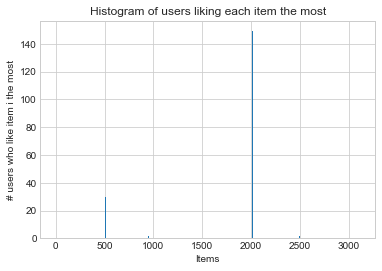

USER_SCORES - Actual scores given by users (rows) to items (columns), unknown to system:
[[0.12 0.13 0.12 ... 0.08 0.38 0.23]
 [0.12 0.14 0.11 ... 0.07 0.37 0.22]
 [0.12 0.13 0.12 ... 0.08 0.37 0.23]
 ...
 [0.12 0.13 0.12 ... 0.07 0.36 0.22]
 [0.13 0.13 0.13 ... 0.07 0.36 0.23]
 [0.13 0.14 0.12 ... 0.08 0.37 0.23]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.00 0.00 0.00 ... 0.00 0.00 0.00]
 [0.00 0.00 0.00 ... 0.00 0.00 0.00]
 [0.00 0.00 0.00 ... 0.00 0.00 0.00]
 ...
 [0.00 0.00 0.00 ... 0.00 0.00 0.00]
 [0.00 0.00 0.00 ... 0.00 0.00 0.00]
 [0.00 0.00 0.00 ... 0.00 0.00 0.00]]
RECOMMENDER - Recommender system ready
RECOMMENDER - Num items: 3115
RECOMMENDER - Users: 1000
RECOMMENDER - Items per iter: 10
RECOMMENDER - Type of recommendation system: content
RECOMMENDER - Num attributes: 3115
RECOMMENDER - Attributes of each item (rows):
[[0.00 1.00 0.00 ... 0.00 1.00 0.00]
 [0.00 0.00 0.00 ... 0.00 0.00 0.00]
 [0.00 0.00 0.00 ... 0.00 0.00 

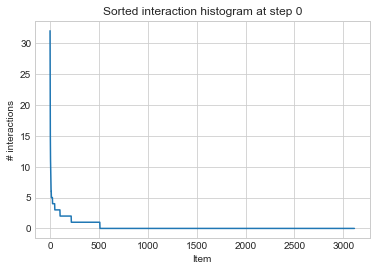

RECOMMENDER - System updates user profiles based on last interaction:
[[0 1 1 ... 0 1 1]
 [0 1 1 ... 1 1 1]
 [1 1 0 ... 1 0 1]
 ...
 [1 0 1 ... 1 1 0]
 [0 1 0 ... 1 1 1]
 [1 0 1 ... 0 0 1]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.13 0.14 0.12 ... 0.07 0.38 0.22]
 [0.12 0.13 0.12 ... 0.08 0.36 0.23]
 [0.12 0.13 0.12 ... 0.07 0.36 0.21]
 ...
 [0.12 0.13 0.10 ... 0.07 0.38 0.23]
 [0.12 0.13 0.12 ... 0.09 0.38 0.22]
 [0.12 0.13 0.12 ... 0.07 0.35 0.23]]
RECOMMENDER - Step 1
RECOMMENDER - Row:
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [997 997 997 ... 997 997 997]
 [998 998 998 ... 998 998 998]
 [999 999 999 ... 999 999 999]]
RECOMMENDER - Indices_prime:
[[   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 ...
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]]
RECOM

RECOMMENDER - System recommended these items (cols) to each user (rows):
[[ 625]
 [2046]
 [2048]
 [2014]
 [ 968]
 [2216]
 [1947]
 [2014]
 [2965]
 [ 445]
 [2762]
 [1621]
 [ 990]
 [2172]
 [ 514]
 [1657]
 [1483]
 [ 816]
 [3025]
 [3104]
 [1220]
 [2068]
 [1975]
 [ 990]
 [2962]
 [3025]
 [ 986]
 [ 680]
 [2951]
 [ 961]
 [ 445]
 [ 986]
 [ 950]
 [1787]
 [1947]
 [1621]
 [ 991]
 [1715]
 [2068]
 [2120]
 [1657]
 [1975]
 [1947]
 [1813]
 [ 816]
 [2951]
 [1924]
 [1483]
 [2062]
 [ 769]
 [1975]
 [2951]
 [ 816]
 [2951]
 [1428]
 [2014]
 [2832]
 [2014]
 [2962]
 [2048]
 [ 441]
 [2147]
 [ 680]
 [2317]
 [2068]
 [1657]
 [1068]
 [ 442]
 [ 442]
 [1657]
 [ 968]
 [1846]
 [2048]
 [1657]
 [ 961]
 [ 680]
 [2048]
 [ 514]
 [1795]
 [ 442]
 [2832]
 [2172]
 [ 441]
 [1715]
 [3025]
 [1951]
 [2014]
 [ 991]
 [1220]
 [2014]
 [1951]
 [1220]
 [ 961]
 [2062]
 [1421]
 [1159]
 [ 510]
 [2172]
 [2046]
 [ 514]
 [2046]
 [1421]
 [ 769]
 [2042]
 [1975]
 [2014]
 [2014]
 [ 445]
 [1785]
 [2046]
 [1421]
 [ 680]
 [1421]
 [ 990]
 [1254]
 [1621]

USER_SCORES - User scores for given items are:
[[0.61 0.54 0.12 ... 0.59 0.63 0.38]
 [0.21 0.37 0.62 ... 0.29 0.64 0.10]
 [0.31 0.35 0.35 ... 0.62 0.63 0.57]
 ...
 [0.13 0.22 0.43 ... 0.06 0.64 0.40]
 [0.35 0.35 0.46 ... 0.26 0.63 0.54]
 [0.51 0.34 0.40 ... 0.59 0.63 0.56]]
RECOMMENDER - Users choose the following items respectively:
[ 625 2046 2048 2014  968 2216 1947 2014 2965  445 2106 1621  990 2172
  514 1657 1483  816 3025 3104 1220 2068 1975  510 2233 3025  986  680
 2951  961 1715  986  950 1787 1947 1621  991 1715 2068 2120 1657 1975
 1947 1813  816 2951 1924 1483 2062  769 1975 2951  816 2951 1428 2014
 2832 2014 2962 2048  441  494  680 1795 2068 1657  680  442  442 1657
  968 1846 2048 1657  961  680 2048  514 1795  442 2832 2172  441 1715
 3025 1951 2014  991 1220 2014 1951 1220  961 2062 3046 1159  510 2087
 2046  514 2046 1421  769 2042 1975 2014 2014 2216 1785 2046 1421  680
 1421  990 1254 1621  553  685 2048 2474  442 2068 1220 2832  769 1483
  441  442 2172  860  680

RECOMMENDER - System updates user profiles based on last interaction:
[[2 4 4 ... 3 3 3]
 [3 4 2 ... 3 3 3]
 [4 1 0 ... 2 3 3]
 ...
 [2 0 4 ... 2 4 3]
 [2 2 2 ... 4 1 4]
 [4 2 3 ... 2 2 3]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.13 0.14 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.08 0.37 0.23]
 [0.13 0.13 0.13 ... 0.08 0.37 0.22]
 ...
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.12 0.13 0.12 ... 0.08 0.37 0.23]
 [0.13 0.13 0.12 ... 0.08 0.36 0.23]]
RECOMMENDER - Step 4
RECOMMENDER - Row:
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [997 997 997 ... 997 997 997]
 [998 998 998 ... 998 998 998]
 [999 999 999 ... 999 999 999]]
RECOMMENDER - Indices_prime:
[[   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 ...
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]]
RECOM

RECOMMENDER - System recommended these items (cols) to each user (rows):
[[ 991  214 2589 1220 1630 1630]
 [ 445  214 1483 2048  986  445]
 [ 460 1975  816  680  769 2832]
 ...
 [2048  816 2493 2172 1323 2474]
 [2474 2951 1975 1483 2493 1787]
 [2014 3025 1951  214 2832 2493]]
RECOMMENDER - System picked these items (cols) randomly for each user (rows):
[[2582  607 1936  856]
 [1735 1982 1838 2571]
 [2897 1691 1895 1985]
 ...
 [1115  515  986 2958]
 [1768 1603 1544  493]
 [1785 1812  527  693]]
USER_SCORES - User scores for given items are:
[[0.63 0.63 0.12 ... 0.62 0.63 0.01]
 [0.64 0.62 0.60 ... 0.63 0.63 0.14]
 [0.64 0.63 0.07 ... 0.63 0.64 0.20]
 ...
 [0.64 0.65 0.64 ... 0.63 0.62 0.41]
 [0.62 0.64 0.59 ... 0.63 0.63 0.44]
 [0.63 0.63 0.53 ... 0.65 0.63 0.09]]
RECOMMENDER - Users choose the following items respectively:
[ 214  445  816 3025 1421 2014 1421  445  680  769  510 2493 2046 2014
  442 2961  445 1220 1483 1657  442  442 1220 2317 1483  680 2014 2048
 1220  442 1630 3025  6

RECOMMENDER - System updates user profiles based on last interaction:
[[4 6 6 ... 6 4 3]
 [5 4 4 ... 4 6 6]
 [6 3 1 ... 5 4 5]
 ...
 [5 2 5 ... 5 6 6]
 [3 3 4 ... 5 3 6]
 [5 4 5 ... 4 5 5]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.08 0.37 0.23]
 [0.13 0.13 0.12 ... 0.08 0.37 0.22]
 ...
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.36 0.23]
 [0.13 0.13 0.12 ... 0.08 0.36 0.23]]
RECOMMENDER - Step 7
RECOMMENDER - Row:
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [997 997 997 ... 997 997 997]
 [998 998 998 ... 998 998 998]
 [999 999 999 ... 999 999 999]]
RECOMMENDER - Indices_prime:
[[   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 ...
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]]
RECOM

RECOMMENDER - System recommended these items (cols) to each user (rows):
[[2172 2361 1782 ... 3104 1951  990]
 [2962 1220  950 ...  442  680 2048]
 [2014 3025 2014 ... 1951 1220  904]
 ...
 [2172  510 1787 ... 2216 1421 1657]
 [2048  947 2832 ... 3025 1759 2832]
 [ 947 2832 2048 ... 1323 2832 2048]]
RECOMMENDER - System picked these items (cols) randomly for each user (rows):
[[ 110  719 1108]
 [2830  763  872]
 [2916 2285  882]
 ...
 [ 522 2829 1047]
 [ 493  693 1076]
 [ 908  599  234]]
USER_SCORES - User scores for given items are:
[[0.14 0.30 0.39 ... 0.63 0.63 0.64]
 [0.51 0.45 0.51 ... 0.63 0.63 0.64]
 [0.33 0.61 0.62 ... 0.63 0.64 0.64]
 ...
 [0.15 0.57 0.06 ... 0.62 0.63 0.63]
 [0.21 0.57 0.39 ... 0.63 0.63 0.65]
 [0.56 0.45 0.24 ... 0.63 0.63 0.63]]
RECOMMENDER - Users choose the following items respectively:
[ 990 1220  961 2216  990  990 2951  680 2048  680 2216 1483 1924  685
 1421  442 2961  445 1220 2832  441  625  445 3104 2120 2048 2317 1220
  514 2046 2147 2048  990 206

RECOMMENDER - System updates user profiles based on last interaction:
[[7 7 9 ... 8 6 5]
 [8 6 6 ... 6 8 8]
 [8 6 3 ... 7 4 6]
 ...
 [8 4 7 ... 8 7 8]
 [6 5 7 ... 7 5 9]
 [7 5 6 ... 5 7 7]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.08 0.36 0.22]
 ...
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.12 0.13 0.12 ... 0.07 0.36 0.23]
 [0.13 0.13 0.12 ... 0.07 0.36 0.23]]
RECOMMENDER - Step 10
RECOMMENDER - Row:
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [997 997 997 ... 997 997 997]
 [998 998 998 ... 998 998 998]
 [999 999 999 ... 999 999 999]]
RECOMMENDER - Indices_prime:
[[   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 ...
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]]
RECO

RECOMMENDER - System picked these items (cols) randomly for each user (rows):
[[1541 2979 1857 ... 1490  766 1817]
 [3101  262 2253 ... 1614 2476  886]
 [3056 2727 2459 ... 2399 3012 1458]
 ...
 [2926  561  612 ... 1700 2055 2412]
 [2916 2220   17 ... 1435 1466 3005]
 [ 934 1473 1642 ... 3062  897 2626]]
USER_SCORES - User scores for given items are:
[[0.62 0.30 0.59 ... 0.48 0.63 0.36]
 [0.63 0.59 0.05 ... 0.18 0.63 0.31]
 [0.59 0.31 0.30 ... 0.03 0.63 0.11]
 ...
 [0.56 0.62 0.61 ... 0.02 0.62 0.15]
 [0.54 0.37 0.47 ... 0.11 0.63 0.17]
 [0.32 0.36 0.47 ... 0.16 0.64 0.33]]
RECOMMENDER - Users choose the following items respectively:
[2068 2106 1563 2223 2951  445 2068 2048  442  685  961  986  816 1878
 1483 2042 2951 2317  947 1421 1421 2762 2172 2961 2048 2068  990  460
 2223 1621 2172  445 1782 2223 2832 1630  445 3025 1782 1924 1878 2961
 2317  442 2172  460 2046  441  445  510 1951 1782 3025  441  816 1657
 2068 2493 1421  961  445 2832   63 2014  442 2046 2068  680  904 2832
 14

RECOMMENDER - System updates user profiles based on last interaction:
[[ 8  7 10 ...  9  7  7]
 [ 9  7  7 ...  7  9  9]
 [10  6  4 ...  9  5  7]
 ...
 [10  5  8 ... 10  8  9]
 [ 7  6  8 ...  9  5 11]
 [ 9  6  7 ...  7  8  8]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.08 0.36 0.22]
 ...
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.12 0.13 0.12 ... 0.07 0.36 0.23]
 [0.13 0.13 0.12 ... 0.07 0.36 0.23]]
RECOMMENDER - Step 12
RECOMMENDER - Row:
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [997 997 997 ... 997 997 997]
 [998 998 998 ... 998 998 998]
 [999 999 999 ... 999 999 999]]
RECOMMENDER - Indices_prime:
[[   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 ...
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0

RECOMMENDER - Items ordered by preference for each user:
[[1697 1175 2153 ...  680 1220 1421]
 [1175 1697 2153 ...  442 2832 2048]
 [1175 1697 2153 ...  442 1220 2014]
 ...
 [1175 1697 2153 ...  680 1657 1421]
 [1697 1175 1152 ... 1421 2832  510]
 [1175 1697 2153 ...  441 2048  445]]
RECOMMENDER - System recommended these items (cols) to each user (rows):
[[1421  950  680]
 [2361 2172  514]
 [1220 1220 2961]
 ...
 [ 625 1787 1657]
 [2832 2317  510]
 [2361  510  553]]
RECOMMENDER - System picked these items (cols) randomly for each user (rows):
[[2672 2844 2642 ... 1574  946  964]
 [1239 2754 1335 ... 2625 3027  246]
 [1542  806 2396 ...   29 1938 1377]
 ...
 [2237 1300  632 ... 1907 1623 1977]
 [ 115  204 2381 ... 2855 2017 2958]
 [2287 1051 2535 ... 2975  110 2235]]
USER_SCORES - User scores for given items are:
[[0.02 0.04 0.49 ... 0.34 0.62 0.59]
 [0.36 0.27 0.08 ... 0.32 0.63 0.21]
 [0.47 0.35 0.06 ... 0.58 0.64 0.30]
 ...
 [0.14 0.42 0.10 ... 0.00 0.62 0.37]
 [0.06 0.48 0.33 ... 0

RECOMMENDER - Users choose the following items respectively:
[ 816 2493 2832 1421 1657 1220  680 1483 3025 2832 2832  494 2216 2216
 1951 2014 1704 2493 2048 2951 1975 2048  816  442 2832  445 2951  625
 2046 1715 1421  769 2962  991  816 2832  816  680  986  990 1795 2832
 1421 1947 2014  510  553  442 1421 1782 1782  441  460 2216 1483 1975
 2361 2589 1495 1220 2493 1220 2961 2068  769  680  990 2317 1951 1483
 1715 3025  553  553 1563  445 2961 1630 2172 1657 2216  961 2172  680
 1975  442 1169 2014  680  685  510 2048  680 2951 3025 2048 1421  961
 2223  442 2014 1975 2474 2048  214 2223 2493  510 2832  990  445 2216
 2046 1951 2216 3025 2361 2014  214 2048 2951 2832 1951  769  510  680
 1715  990 1715  950 1951 1951 1947  816  769 2034  990 2951  441 3025
 2361  441 2962  514  510 2048 1951 2046 3025 3046 2317 2014 1951  442
 2014 1220  214 2474  685 2014 2493 2493 1421  986 2172 2361  460 2832
  510 2046 2048 2172 1715  510 2046 1782 1951 2493 1715 1483 2832 2048
  816 2961  510 

RECOMMENDER - System updates user profiles based on last interaction:
[[12  9 11 ... 11 10 10]
 [12 10 11 ...  8 11 11]
 [13  9  8 ... 12  8 10]
 ...
 [13  7 10 ... 13  9 12]
 [11  9 12 ... 13  7 11]
 [13  9  9 ...  9  9 10]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.12 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.36 0.23]
 ...
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.12 0.13 0.12 ... 0.07 0.36 0.23]
 [0.13 0.13 0.12 ... 0.07 0.36 0.23]]
RECOMMENDER - Step 16
RECOMMENDER - Row:
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [997 997 997 ... 997 997 997]
 [998 998 998 ... 998 998 998]
 [999 999 999 ... 999 999 999]]
RECOMMENDER - Indices_prime:
[[   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 ...
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0

USER_SCORES - User scores for given items are:
[[0.61 0.63 0.62 ... 0.63 0.62 0.26]
 [0.63 0.61 0.63 ... 0.64 0.63 0.62]
 [0.62 0.63 0.63 ... 0.63 0.63 0.44]
 ...
 [0.63 0.63 0.63 ... 0.63 0.63 0.53]
 [0.61 0.63 0.63 ... 0.63 0.63 0.46]
 [0.63 0.63 0.62 ... 0.62 0.62 0.43]]
RECOMMENDER - Users choose the following items respectively:
[2495 1947 1715 2361  441 1630 2216 2046 2216 2493 2046 2317  991  441
 2046 1220 3046 2216 2216 1782 3104  441  680  769 2014 2317 1421 1951
 2317 2951  685 1421 2014  510  553 1421 2832  816  441 3025  680 2014
 2361  680  625 3104 1657  769 2832  514 1715 2172 2317  990  680 1782
 2493 2172 1975 1715 2317  990  510  680  961 2493 2474 1483 1975  680
 1483  990 1169  441  445 1421 2317  950  990  986  816 2832 1483 2832
 2216 3025 3025 3025  514 1421 2216 1951  442 1621 2048 1715 2493 1715
  214 1951  990  816 3104  441  514  961  680  986  816 1621 2048 1795
 1657 1169 2172 1657 1951 1421 2317 1715 2172 2048  769 1483  680 2068
  961 2046 1621 2046 1782

RECOMMENDER - System updates user profiles based on last interaction:
[[13 11 12 ... 12 12 11]
 [14 11 13 ...  9 12 12]
 [15  9  9 ... 14  9 12]
 ...
 [14  8 12 ... 15 10 14]
 [12  9 14 ... 15  8 12]
 [13 10 10 ... 11 10 12]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.36 0.23]
 ...
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.12 0.13 0.12 ... 0.07 0.36 0.23]
 [0.12 0.13 0.12 ... 0.07 0.36 0.23]]
RECOMMENDER - Step 18
RECOMMENDER - Row:
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [997 997 997 ... 997 997 997]
 [998 998 998 ... 998 998 998]
 [999 999 999 ... 999 999 999]]
RECOMMENDER - Indices_prime:
[[   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 ...
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0

RECOMMENDER - Items ordered by preference for each user:
[[1175 1697 2153 ... 2951  680 1220]
 [1175 1697 2153 ... 2951 2172 2048]
 [1175 1697 2153 ...  990  442 2014]
 ...
 [1175 1697 2153 ...  680  990 1421]
 [1175 1697 1152 ... 2493 2832 1421]
 [1175 1697 2153 ...  442  445 2048]]
RECOMMENDER - System recommended these items (cols) to each user (rows):
[[1704 1715 1220 ... 3025  961 1667]
 [2172 1483  961 ... 2951 1951 2048]
 [2172 1782  680 ...  680  625 2961]
 ...
 [3025  685 1421 ... 2068 2068 1947]
 [ 460 2062 1785 ... 1421 2048 1621]
 [3025  769 2317 ... 2317 1951 2172]]
RECOMMENDER - System picked these items (cols) randomly for each user (rows):
[[2513  578 1946]
 [2052 1569 3078]
 [3077 2800 1093]
 ...
 [ 822 1480 1136]
 [2642   34 2648]
 [2310 1424   53]]
USER_SCORES - User scores for given items are:
[[0.62 0.45 0.62 ... 0.63 0.62 0.17]
 [0.63 0.42 0.61 ... 0.63 0.63 0.35]
 [0.62 0.54 0.63 ... 0.62 0.63 0.46]
 ...
 [0.62 0.34 0.63 ... 0.62 0.63 0.49]
 [0.63 0.29 0.63 ... 0

RECOMMENDER - Users choose the following items respectively:
[1951 2068  680 1947 1715 1483  769 2832 2223 2317 1782  680 2048 2493
 2216 2951  510 1421  514 2317 1924  460 2951 2068  961 2216 3025  986
 1782  445 1782 1795 1951  947 3046 2493 2361  514  991  685 1782  986
  961  685  961  442 1630 2951 2317 2361 2493 1975  990  769 2951 1421
 1421 1924 2068  445 2048 1782 2014 2216 1924 2962  441  816  769  816
 1951 2962 2223  494 1220 3025 2493 1924  460  680  685 2046  986 1924
 2048 1621  769 1795 1483 2317  441  514 3025  769 1354  680 1951 2474
  441  685  460  990  553 2361  442  991 1621 1759 3104 1657 2172  442
 1483 3025 2068 2172 2493 1220  685 3025 2046  441  442  460 1657 1421
 2120 2048  990 1483 1630  990 3025 2068  986  685  986  685 2493 1715
 3104 1951  625  460  514 1483  214 2223 2317  460  514 1630 2046 1975
 2589  625 1951  510 2068  514 2474 2048  498 3025 2317 2951  510 1782
  680  441 1975 2046  769  445 1621  685  769  442  816 1428 2951 2046
  214 2317 2317 

RECOMMENDER - System updates user profiles based on last interaction:
[[15 13 15 ... 15 15 14]
 [18 12 15 ... 13 15 13]
 [18 11 13 ... 18 12 15]
 ...
 [17 11 16 ... 16 13 16]
 [15 12 17 ... 17 11 15]
 [17 11 14 ... 14 12 16]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.36 0.23]
 ...
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.12 0.13 0.12 ... 0.07 0.36 0.23]
 [0.12 0.13 0.12 ... 0.07 0.36 0.23]]
RECOMMENDER - Step 22
RECOMMENDER - Row:
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [997 997 997 ... 997 997 997]
 [998 998 998 ... 998 998 998]
 [999 999 999 ... 999 999 999]]
RECOMMENDER - Indices_prime:
[[   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 ...
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0

RECOMMENDER - Items ordered by preference for each user:
[[1175 1697 2153 ... 2951  441 1220]
 [1175 1697 2153 ...  510 2951 2048]
 [1175 1697 2153 ...  990  442 2014]
 ...
 [1175 1697 2153 ... 2172  990 1421]
 [1175 1697 2153 ... 2832 2048 1421]
 [1175 1697 1152 ...  442 2048  445]]
RECOMMENDER - System recommended these items (cols) to each user (rows):
[[2951  549 1715 3025]
 [ 961  498  685 2048]
 [ 442  990  214 1483]
 ...
 [2062 1621  680 1630]
 [ 986 2317  961 1169]
 [2951  986  549 2216]]
RECOMMENDER - System picked these items (cols) randomly for each user (rows):
[[ 311 2866  435 1198 1902 3057]
 [2626 2465 1294  609  392 2186]
 [ 970 1683 1971  854 2979 3097]
 ...
 [ 757 1134 1755 2401 1296 1084]
 [ 718 2010  975 2293 2676 1614]
 [ 471  775  207 1097  705  942]]
USER_SCORES - User scores for given items are:
[[0.63 0.27 0.62 ... 0.22 0.63 0.30]
 [0.62 0.43 0.63 ... 0.63 0.61 0.38]
 [0.63 0.20 0.63 ... 0.24 0.63 0.35]
 ...
 [0.63 0.24 0.62 ... 0.31 0.63 0.49]
 [0.63 0.51 0.63

RECOMMENDER - Users choose the following items respectively:
[2172  769 2223 2951 2962 2361 3046  991  441  816 2951  442 2951 2951
  441 1621 1947 1657 2120 1563 1630 1483 1782 1782 1621 1630 1759 2046
 2216 2068  214 2474 1657 2048 2361  510  680 2068  514 1169 2474 2223
 1924  961 1975 2493  685 1220 1630  990  514 1483 2474 2961 1795  625
 2474  510  442 3046 2961 1947 1563  445  680  961 1951  445 2216  986
 1169  680  680  816  214 1323 2172 2046 1323  282 2493 1220 2951 2172
 1715 2042  816 2068 2589 1220  816  680  441  986 1421 2068  685 1951
 1220  498  680  769 3025  510 2048  214 1657 1715  986  460 1947  991
 2951  961  460 2361 2172 1795 1657 2962 1630  769 1782 1947 3104  460
 1657 1483 1951 2216  961  514 1657 1715  991  860  514  680 1621 1759
  553 1795 1704  445 1630 2474  510  510 3104  442 1924 1483 2223 2493
 1220 2317  514 1630 1715  445 1630 1169 1754 3046 2474  214  968  961
  441  514 1947 1715  441 1169 1782 2172 2961 1715 1220 2014 1323  441
  986 1715  625 

RECOMMENDER - System updates user profiles based on last interaction:
[[18 15 17 ... 18 17 16]
 [21 14 18 ... 16 19 15]
 [20 14 15 ... 20 15 17]
 ...
 [21 14 20 ... 20 16 19]
 [19 13 17 ... 19 15 16]
 [20 14 16 ... 16 16 17]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.36 0.23]
 ...
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.36 0.23]
 [0.12 0.13 0.12 ... 0.07 0.36 0.23]]
RECOMMENDER - Step 26
RECOMMENDER - Row:
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [997 997 997 ... 997 997 997]
 [998 998 998 ... 998 998 998]
 [999 999 999 ... 999 999 999]]
RECOMMENDER - Indices_prime:
[[   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 ...
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0

RECOMMENDER - System picked these items (cols) randomly for each user (rows):
[[ 689 2375 2752 ...  252 2597 2457]
 [2881 2532 3081 ... 2065  174 2518]
 [1510 3079 2732 ...  281 3072  403]
 ...
 [1020  952    0 ... 2184 1740 2860]
 [2029 1560 1086 ... 3091  886  173]
 [1409 2513 1188 ... 1708 2824 1504]]
USER_SCORES - User scores for given items are:
[[0.36 0.37 0.03 ... 0.63 0.38 0.43]
 [0.15 0.47 0.07 ... 0.27 0.48 0.57]
 [0.57 0.24 0.61 ... 0.24 0.06 0.51]
 ...
 [0.31 0.61 0.12 ... 0.58 0.57 0.34]
 [0.53 0.27 0.16 ... 0.14 0.28 0.05]
 [0.08 0.43 0.36 ... 0.56 0.26 0.08]]
RECOMMENDER - Users choose the following items respectively:
[ 769 1715 1787 2048 3104 1495 1951 1782 1630 2962 1323 2961  328 2961
  460 2062 1563  510  510 2692 3046 2046 2046 2962 2495 2106 2216  968
 2068 1795 2068  947 1630 3025  514  961 3046 1657 1947  381 1951 1951
 2216 1975 1220  625 1075 1715 1947  816  442 1947 2068 3025 1061 2223
  498 3046 1759  514 1785 2068 1630 3104 2233  510 1621  514 1795  441
  9

USER_SCORES - User scores for given items are:
[[0.33 0.63 0.62 ... 0.63 0.63 0.63]
 [0.02 0.63 0.63 ... 0.62 0.63 0.63]
 [0.33 0.63 0.62 ... 0.63 0.63 0.63]
 ...
 [0.30 0.63 0.63 ... 0.63 0.63 0.62]
 [0.25 0.63 0.63 ... 0.63 0.63 0.62]
 [0.24 0.62 0.63 ... 0.63 0.63 0.62]]
RECOMMENDER - Users choose the following items respectively:
[ 986  460  442  991 3025 1947 2172 2474  968  990  816 1878 1621 3025
  961 2216  553  986 1169  514 3025 2474 1947 2216 2961 1483 2474 1169
 2493 2493  961 2223 2223  685 2317 1657 2951 2172 2962  514 1621 1947
 2493  514 1846 1621 2223  685 1975 2172 2832 1715  625  680  685  510
  510  904 1951 2046  961 1704  816 2493 1795  991  460 2951 1621 1169
 2223 1621 2474  445 1924  549  625 1975 1715 1621 2951  514 2223 1483
 1795 1975  625  214  986 1759  553  769 1621 1323 1630 1975 3025 2317
 1630 1795 2068 2317 1657  514 1483 1220  769 1169 1759 3025 2223 2474
 2172  442  961 2317 1483  514 3104  769  328 1621  904 3025 2951 1947
 1951 1169 2042 1947 1715

RECOMMENDER - System updates user profiles based on last interaction:
[[21 18 19 ... 21 20 17]
 [22 14 21 ... 19 21 16]
 [22 16 17 ... 22 17 19]
 ...
 [24 16 22 ... 21 19 20]
 [21 15 20 ... 21 17 18]
 [23 16 17 ... 17 19 18]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.36 0.23]
 ...
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.36 0.23]
 [0.12 0.13 0.12 ... 0.07 0.37 0.23]]
RECOMMENDER - Step 29
RECOMMENDER - Row:
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [997 997 997 ... 997 997 997]
 [998 998 998 ... 998 998 998]
 [999 999 999 ... 999 999 999]]
RECOMMENDER - Indices_prime:
[[   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 ...
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0

USER_SCORES - User scores for given items are:
[[0.31 0.63 0.62 ... 0.62 0.62 0.63]
 [0.62 0.61 0.63 ... 0.62 0.62 0.62]
 [0.41 0.62 0.63 ... 0.63 0.63 0.63]
 ...
 [0.56 0.63 0.63 ... 0.63 0.62 0.62]
 [0.39 0.61 0.62 ... 0.62 0.63 0.63]
 [0.24 0.63 0.62 ... 0.63 0.63 0.63]]
RECOMMENDER - Users choose the following items respectively:
[3104 2172 1878 2172  961  582  441 3104 1483 1924 3025 1782  680 1630
 1782  514 1630 3046 2317  991  625  769 2965 1621 1759  990  961 2474
 3046 2962 2951 1947 1924 2317 2068 1947 1483  460 1715 2832  441 1169
  685 2216  442 2317  514  625 1715 2951 1657 2961 2216 1630 1715 1323
 2062  947 2493  680 1924 1323 1947 2361 1483 1715 1782  441 3104 2216
 3104 1630  961  986 2961  460 2062 1787  441 1630 1621 2120 1795 2317
  510  625 1563 1220 1323 2361  514  685 2042 3025  685  769 2317 1947
 2042  549 1947 3104  961 2962 2951 1169  514  445 2961  947 1563  950
 2474 2474  441 2014 3046 1323  625 3046  514 1975 2361 2046 2962 1782
 2223 2474  769  553  549

RECOMMENDER - System updates user profiles based on last interaction:
[[23 20 21 ... 21 21 19]
 [23 15 23 ... 21 22 18]
 [23 17 19 ... 23 19 20]
 ...
 [25 16 24 ... 23 21 21]
 [22 15 22 ... 21 18 20]
 [25 18 19 ... 17 21 20]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.36 0.23]
 ...
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.36 0.23]
 [0.12 0.13 0.12 ... 0.07 0.36 0.23]]
RECOMMENDER - Step 31
RECOMMENDER - Row:
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [997 997 997 ... 997 997 997]
 [998 998 998 ... 998 998 998]
 [999 999 999 ... 999 999 999]]
RECOMMENDER - Indices_prime:
[[   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 ...
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0

RECOMMENDER - Items ordered by preference for each user:
[[1175 1697 2153 ... 2951  441 1220]
 [1175 1697 2153 ... 2317 2951  510]
 [1175 1697 1152 ... 2493  990 2014]
 ...
 [1175 1697 2153 ... 2068 2317 2951]
 [1175 1697 2153 ... 2493  990 1421]
 [1175 1697 1152 ... 2951  442  445]]
RECOMMENDER - System recommended these items (cols) to each user (rows):
[[1220]
 [1483]
 [2474]
 [2962]
 [2317]
 [1428]
 [2474]
 [2216]
 [1782]
 [2172]
 [1924]
 [1220]
 [2172]
 [1715]
 [1795]
 [1951]
 [1239]
 [2048]
 [ 991]
 [ 968]
 [2951]
 [1621]
 [2147]
 [1975]
 [ 441]
 [1704]
 [1715]
 [ 328]
 [1323]
 [ 582]
 [1483]
 [1782]
 [2493]
 [ 553]
 [3104]
 [2062]
 [ 904]
 [ 950]
 [ 990]
 [2068]
 [2014]
 [ 460]
 [2223]
 [2951]
 [ 769]
 [ 214]
 [ 904]
 [ 214]
 [2961]
 [1621]
 [ 961]
 [ 553]
 [1180]
 [ 685]
 [2068]
 [2172]
 [ 514]
 [2961]
 [1621]
 [1759]
 [1715]
 [2048]
 [1715]
 [1630]
 [2474]
 [ 460]
 [ 510]
 [1563]
 [ 625]
 [ 990]
 [1947]
 [1159]
 [ 460]
 [2951]
 [2172]
 [ 510]
 [1924]
 [2832]
 [ 553]
 [ 445]
 [

RECOMMENDER - System picked these items (cols) randomly for each user (rows):
[[1100 2664   36 ...  455 1362 2745]
 [1914 1898  146 ...  487 2022 2933]
 [2195 1997 1042 ...  888 2418  389]
 ...
 [2635 2120  844 ...  868 2948 2756]
 [ 931 1717 1991 ...  791 1758  873]
 [1362  940  484 ... 1884 2674  723]]
USER_SCORES - User scores for given items are:
[[0.02 0.30 0.28 ... 0.34 0.50 0.35]
 [0.07 0.06 0.40 ... 0.58 0.13 0.27]
 [0.31 0.49 0.52 ... 0.03 0.31 0.03]
 ...
 [0.56 0.08 0.47 ... 0.43 0.42 0.05]
 [0.51 0.54 0.13 ... 0.24 0.18 0.26]
 [0.49 0.50 0.52 ... 0.38 0.19 0.38]]
RECOMMENDER - Users choose the following items respectively:
[1220 1483 2474 2962 2317 1428 2474 2216 1782 2172 1924 1220 2172 1715
 1795 1951 1239 2048  991  968 2951  947 2147 1975  441 1704 1715  328
 1323  582 1483  460 2493  553 3104 2046  904  950 1878 2428 2014  460
 2223 2951  769 1505  904  214 2961 1621  961  553 2510  685 2068 2172
 1254 2961 1068 1688 1715 2048 1715 1630 2474  460  510 1563  625  990
 19

RECOMMENDER - System updates user profiles based on last interaction:
[[26 23 23 ... 24 23 21]
 [26 17 25 ... 23 23 20]
 [25 17 22 ... 24 22 20]
 ...
 [26 19 26 ... 24 23 23]
 [23 16 24 ... 23 21 22]
 [27 20 21 ... 19 23 22]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.36 0.23]
 ...
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.36 0.23]
 [0.12 0.13 0.12 ... 0.07 0.36 0.23]]
RECOMMENDER - Step 34
RECOMMENDER - Row:
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [997 997 997 ... 997 997 997]
 [998 998 998 ... 998 998 998]
 [999 999 999 ... 999 999 999]]
RECOMMENDER - Indices_prime:
[[   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 ...
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0

RECOMMENDER - Items ordered by preference for each user:
[[1175 1697 2153 ... 3025 2951  441]
 [1175 1697 2153 ... 2317 2951  510]
 [1175 1697 1152 ... 2493  990 2014]
 ...
 [1175 1697 2153 ... 2317  514 2068]
 [1175 1697 2153 ...  990 2493 1421]
 [1175 1697 2153 ... 2951  442  445]]
RECOMMENDER - System recommended these items (cols) to each user (rows):
[[2223 1782 3046 ...  441 2223 2493]
 [1975 1621  961 ... 2317  625  986]
 [1630  514 2493 ...  986 1782  514]
 ...
 [1878 2317  514 ... 1075 1169 1169]
 [3046  990  961 ...  769 2495 1421]
 [2361 3104 1787 ...  442  445 1428]]
RECOMMENDER - System picked these items (cols) randomly for each user (rows):
[[ 357]
 [1404]
 [1244]
 [ 918]
 [1701]
 [ 364]
 [1701]
 [ 916]
 [ 738]
 [2157]
 [ 560]
 [2904]
 [1026]
 [ 519]
 [2658]
 [1999]
 [2886]
 [3089]
 [1260]
 [3009]
 [1909]
 [1829]
 [1934]
 [2938]
 [ 808]
 [2951]
 [2103]
 [2212]
 [2225]
 [1027]
 [ 339]
 [ 908]
 [2365]
 [2299]
 [2373]
 [1436]
 [2074]
 [2651]
 [ 665]
 [2837]
 [2012]
 [ 232]


USER_SCORES - User scores for given items are:
[[0.63 0.61 0.63 ... 0.63 0.63 0.62]
 [0.63 0.62 0.63 ... 0.63 0.62 0.63]
 [0.62 0.62 0.63 ... 0.62 0.61 0.64]
 ...
 [0.63 0.62 0.62 ... 0.63 0.62 0.63]
 [0.62 0.62 0.61 ... 0.63 0.61 0.63]
 [0.62 0.62 0.63 ... 0.63 0.62 0.63]]
RECOMMENDER - Users choose the following items respectively:
[3046  625  685 1495  685 1782  214  685  991 1159 1563 1421 2068  904
 1169 1630 1715  282  625 2361  510 1169  961 3106  990 1159  625 2087
 2474 2961 3046 1759 2172  442 2961  968  460 1951  328   63 3046 2589
 1323 1715 1795 2474 2961  991  441 2317 2014  514 2120 2034 1975 2474
  553 1975 1795  990  968 2962  968  961 1657  685 1180  328 2474 2068
 2317  553 2042  328 1947 1428 1323 2317 2474  549  947  328 2965  514
  498 2762 2961 1704  961 1947 2172 3104 2068 2495 2068  685 1947 1782
 2361 1947  444  685 2147 2495 1951 2120  961 1621 1795 2172 2474 1483
  214 1483 2361 1975  625 1621 1947 2223 2961 2216  685 1782  968 3046
 1924 2961  968 1782 3046

RECOMMENDER - System updates user profiles based on last interaction:
[[28 26 25 ... 24 26 22]
 [27 19 27 ... 25 25 23]
 [27 19 24 ... 27 24 22]
 ...
 [27 21 29 ... 26 25 25]
 [26 19 26 ... 25 22 24]
 [30 20 24 ... 21 25 24]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.12 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.36 0.23]
 ...
 [0.12 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.12 0.13 0.12 ... 0.07 0.36 0.23]]
RECOMMENDER - Step 37
RECOMMENDER - Row:
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [997 997 997 ... 997 997 997]
 [998 998 998 ... 998 998 998]
 [999 999 999 ... 999 999 999]]
RECOMMENDER - Indices_prime:
[[   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 ...
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0

RECOMMENDER - Items ordered by preference for each user:
[[1175 1697 2153 ... 2951 2493  441]
 [1175 1697 2153 ... 2317  510 2951]
 [1175 1697 1152 ...  990 2493 2014]
 ...
 [1175 1697 1152 ...  514 2317 2068]
 [1175 1697 2153 ...  769  990 1421]
 [1175 1697 2153 ... 2216  769 2951]]
RECOMMENDER - System recommended these items (cols) to each user (rows):
[[2042 1667  441 ... 2589 2106 2589]
 [1621 1495 2062 ... 1975 3022 1169]
 [1630  991 2962 ... 1323 1924 1924]
 ...
 [1787 1621 2361 ... 2068  214 2962]
 [ 986  625 2223 ...  460  460 3046]
 [ 769 1483  685 ... 1975 1878 2120]]
RECOMMENDER - System picked these items (cols) randomly for each user (rows):
[[2383 1662]
 [1188 1269]
 [1822  263]
 ...
 [1635 1295]
 [  50  220]
 [1450 1560]]
USER_SCORES - User scores for given items are:
[[0.62 0.60 0.63 ... 0.62 0.22 0.63]
 [0.61 0.36 0.62 ... 0.62 0.10 0.62]
 [0.63 0.48 0.62 ... 0.62 0.09 0.63]
 ...
 [0.63 0.05 0.62 ... 0.62 0.10 0.63]
 [0.63 0.24 0.62 ... 0.62 0.12 0.61]
 [0.63 0.47 0.6

RECOMMENDER - Users choose the following items respectively:
[2493 2317  990  986 1563 2495 1505  214  685 1759  214 1323 2493 2474
  950 2474 1924 2589  214 1630  460 2493 1323 2172  445 2062 2120 1563
  961 2151  990 1975 2317 2832 2147  947  441 1975  990 2961 1704  553
 2762  625  510 1928 1483 2493 2495  986 1505 3104 1421  625 1924  514
  950 2046  950  582  904 1428 3046 1323 1621 1975 2962  986 1563 1495
 2042  514  510 2317 2087 2042 1220 1657  816 3104 1787  510 1975  498
  968  961  990  549 2068 1715 1505 2216 1169  553 2965 2046  950 2493
  860 1159 3104 1220 1323 2589  991 1563 1590 3025 1323 1169  553  582
 2147 2062 1951 1715 2589 1630 1483  214 2317 1782 2961 2042 2762  625
 1169 1795  553 3046 1924  961 2962 1975 2062 1621 1621 1630 3104 2962
 1795 2495 2042 1704  625 2120 2062 2474 1704  961 1947 3060 1787 2951
  986  680 3046 1795 2042 3046 1951 1483 1563 1621 1159  442  282  986
 2962 1159 1715 1878 2046 1621  214 1220 2046  553  510 1715 2062 1795
 1169  990 1483 

RECOMMENDER - System updates user profiles based on last interaction:
[[31 28 29 ... 26 28 24]
 [30 23 30 ... 28 28 26]
 [29 22 26 ... 30 27 24]
 ...
 [30 23 32 ... 27 27 28]
 [28 23 29 ... 28 25 27]
 [32 23 28 ... 24 29 25]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.12 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 ...
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.12 0.13 0.12 ... 0.07 0.37 0.23]
 [0.12 0.13 0.12 ... 0.07 0.36 0.23]]
RECOMMENDER - Step 41
RECOMMENDER - Row:
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [997 997 997 ... 997 997 997]
 [998 998 998 ... 998 998 998]
 [999 999 999 ... 999 999 999]]
RECOMMENDER - Indices_prime:
[[   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 ...
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0

RECOMMENDER - Items ordered by preference for each user:
[[1175 1697 2153 ... 3025  441 2951]
 [1175 1697 2153 ... 2962  510 2951]
 [1175 1697 1152 ... 2317 2493 2014]
 ...
 [1175 1697 1152 ...  514 2068 2317]
 [1175 1697 2153 ... 2223  769  990]
 [1175 1697 2153 ... 2216  769 2951]]
RECOMMENDER - System recommended these items (cols) to each user (rows):
[[1715 2951]
 [1924 1323]
 [ 625 2317]
 ...
 [2961 1428]
 [ 769 1159]
 [ 947  625]]
RECOMMENDER - System picked these items (cols) randomly for each user (rows):
[[2698 2288 2892 ... 3055 1341 2904]
 [ 458 2912  688 ... 1714 2820  496]
 [2657 1884 2631 ...  803 2812  353]
 ...
 [2828 2203 2843 ... 2703 2106 2292]
 [  61  187 1423 ... 2424 1728 2729]
 [ 126   63 1842 ...   76 2969  360]]
USER_SCORES - User scores for given items are:
[[0.24 0.62 0.40 ... 0.44 0.63 0.08]
 [0.20 0.62 0.59 ... 0.58 0.63 0.55]
 [0.11 0.62 0.02 ... 0.03 0.62 0.26]
 ...
 [0.54 0.63 0.24 ... 0.36 0.63 0.42]
 [0.16 0.61 0.35 ... 0.23 0.62 0.43]
 [0.33 0.62 0.6

RECOMMENDER - Users choose the following items respectively:
[ 685 2223 2589 3104 2961 2147  860 2962 1795 1323  990 2223  445 1759
 2068 1787 2068 2962 2495  441 1621  214  460  553  968 2495  498  510
  685 2361 2216 1621  625  986 1630  986 1785 2223  625 1787  460 3000
  514  460 1715 1924 1795 1563 1759  860 1563 1813 2223 1924 2965 1924
 2042 1947 1483  328 1483 2172  947  514  904  498 1630 2961 1924 2495
 1495  460  214 2087 1787 1846 1795 1563 3046 1975  968 1657 1754 3025
 1254 3104 1924 1975  214 1428  625 2120 2495  685 1505 1782 1563 2068
  947 2965 2048 1715 1759  498 2087 1767  904 1975  442  968 2178  506
 1759 2046  510 2474 1715 2774 2216  685 1975  990 2034 1428 1563 1924
 2062 1621  514  460 2216 3104 1975  553 2172 2961  947 3046  991 3104
  961  494  685  553 2361 1075 1428 2495  904 2042 2106 3104  328 2361
 1483 1787 2495  968  991 2087 2951 1782 2965 1947 2068 1704 1795  947
 2961 1754 3046 2147 3104  553 3046  947  991 1782 2961  685  625  553
 2106 2042  680 

RECOMMENDER - System updates user profiles based on last interaction:
[[32 31 31 ... 28 30 26]
 [32 24 32 ... 30 32 28]
 [32 25 28 ... 31 30 27]
 ...
 [32 25 35 ... 30 30 30]
 [31 23 31 ... 30 27 30]
 [34 27 31 ... 27 32 27]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.12 0.13 0.12 ... 0.07 0.37 0.23]
 ...
 [0.12 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.12 0.13 0.12 ... 0.07 0.37 0.23]]
RECOMMENDER - Step 45
RECOMMENDER - Row:
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [997 997 997 ... 997 997 997]
 [998 998 998 ... 998 998 998]
 [999 999 999 ... 999 999 999]]
RECOMMENDER - Indices_prime:
[[   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 ...
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0

RECOMMENDER - Items ordered by preference for each user:
[[1175 1697 2153 ... 1782 3025  441]
 [1175 1697 2153 ...  961 2962  510]
 [1175 1697 1152 ... 1947  514 2014]
 ...
 [1175 1697 1152 ... 2317  514 2068]
 [1175 1697 2153 ... 2223  769  990]
 [1175 1697 2153 ... 2216  769 2951]]
RECOMMENDER - System recommended these items (cols) to each user (rows):
[[2147 1495 1782]
 [ 328 1787  904]
 [2014 1782 1630]
 ...
 [2042 1563  553]
 [2962  904 1075]
 [ 968 1366  769]]
RECOMMENDER - System picked these items (cols) randomly for each user (rows):
[[2036 1619  158 ...  215 2365 1835]
 [1131 2225  935 ... 1909 1319   48]
 [ 267 2175 1834 ... 2695 1344  619]
 ...
 [2183 1971 2870 ... 2162 2653 2192]
 [2054 2886   58 ... 2045 2809 1871]
 [ 448 1308 2174 ... 2937 1241 1410]]
USER_SCORES - User scores for given items are:
[[0.21 0.16 0.63 ... 0.26 0.52 0.63]
 [0.47 0.27 0.63 ... 0.23 0.32 0.62]
 [0.58 0.44 0.62 ... 0.15 0.51 0.62]
 ...
 [0.01 0.41 0.63 ... 0.42 0.22 0.62]
 [0.27 0.47 0.63 ... 0

RECOMMENDER - Users choose the following items respectively:
[1180 2495 1704 2068 2474  769 2120  904 3104  860 2068  441  904  625
 2474 1759  991 1505 2962  214 1563 2951  214  904 1563  968 1169 2147
 1759 1704  549  990 1323  816 1654 1759 2151 1483 1159  442  214 2774
 1759  991  685  506 1704  904 2962 1563 1159  214  553 1495  553  553
 2120  282 2120 1563 2068  549 1795  991 1759 1169  625 2046 1759  282
  685 2951  328 2493 1323  553 2832 2961 1563 3046 2087  460 3104 1878
  904 2223 1483 1169  904 2068 1630 2762  685 1759 1169 1323 1354 3104
  986  986  961 1795  506 2961 1323  950 1767 2042 1975 1759 2317 1928
  816 1159  625 1759  685  961 1428 2762  214 2961  680 1704 2120 2495
 1323 1924 1928  986 2087 1657 1483  625  961 2120  282 1323  961  494
 1159 3025 2961 1924 2223 1621 2474 1621 1787 2172 2042  582 3025 3104
  904  950 2087  328  961  950  553 2961 1795 1483 1767  549 2961 2962
  625 2962  625  553  947  328  968  950 2965 1169  582  549  950 2589
 3046 2965  282 

RECOMMENDER - System updates user profiles based on last interaction:
[[35 33 33 ... 31 32 30]
 [34 26 34 ... 31 34 29]
 [35 27 31 ... 31 32 30]
 ...
 [33 27 37 ... 32 33 33]
 [35 25 33 ... 33 30 31]
 [36 29 33 ... 31 34 30]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.12 0.13 0.12 ... 0.07 0.37 0.23]
 ...
 [0.12 0.13 0.12 ... 0.07 0.37 0.23]
 [0.12 0.13 0.12 ... 0.07 0.37 0.23]
 [0.12 0.13 0.12 ... 0.07 0.37 0.23]]
RECOMMENDER - Step 49
RECOMMENDER - Row:
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [997 997 997 ... 997 997 997]
 [998 998 998 ... 998 998 998]
 [999 999 999 ... 999 999 999]]
RECOMMENDER - Indices_prime:
[[   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 ...
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0

RECOMMENDER - System recommended these items (cols) to each user (rows):
[[1366  904 1715]
 [1878 1924 2962]
 [1505 1759  582]
 ...
 [2962 2068 1563]
 [1169 1795 1563]
 [1428 3046 2951]]
RECOMMENDER - System picked these items (cols) randomly for each user (rows):
[[2406 3088 2549 ... 3075  111 2939]
 [ 406 2835 2659 ... 1383 2484 1821]
 [ 714 2722 1034 ...  122 1816 1002]
 ...
 [1077 2881 2578 ... 2710  324 1034]
 [1108  319 1834 ... 1903 2344 2143]
 [1230 1658 2097 ... 1563 1263 1779]]
USER_SCORES - User scores for given items are:
[[0.62 0.62 0.47 ... 0.19 0.58 0.56]
 [0.62 0.62 0.50 ... 0.32 0.55 0.31]
 [0.62 0.62 0.51 ... 0.33 0.54 0.10]
 ...
 [0.62 0.62 0.10 ... 0.36 0.62 0.25]
 [0.62 0.62 0.56 ... 0.55 0.44 0.32]
 [0.63 0.62 0.49 ... 0.59 0.63 0.58]]
RECOMMENDER - Users choose the following items respectively:
[1366 1924  582 2495  904 3104 2151  947 1715 2774 1621 2062 1323 2495
 3025 2317 2474  553 1813 1505 2087 1795 2361 1563  947  498 1924 1704
 1947 2216  986 1075  860 179

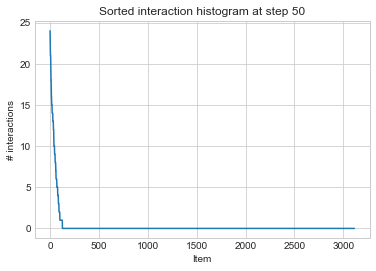

RECOMMENDER - System updates user profiles based on last interaction:
[[35 35 34 ... 32 33 30]
 [36 27 35 ... 33 35 30]
 [36 29 33 ... 31 34 30]
 ...
 [34 28 37 ... 33 34 34]
 [37 26 35 ... 33 32 32]
 [38 29 34 ... 33 35 30]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.12 0.13 0.12 ... 0.07 0.37 0.23]
 ...
 [0.12 0.13 0.12 ... 0.07 0.37 0.23]
 [0.12 0.13 0.12 ... 0.07 0.37 0.23]
 [0.12 0.13 0.12 ... 0.07 0.37 0.23]]
RECOMMENDER - Step 51
RECOMMENDER - Row:
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [997 997 997 ... 997 997 997]
 [998 998 998 ... 998 998 998]
 [999 999 999 ... 999 999 999]]
RECOMMENDER - Indices_prime:
[[   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 ...
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0

RECOMMENDER - System recommended these items (cols) to each user (rows):
[[3025  441 2042 ... 1782 2610 1323]
 [1428 3046 1563 ... 1704  328 1428]
 [ 549 1428 2495 ... 2042 1782 1795]
 ...
 [2317 2223 2062 ... 1924  860 1483]
 [2762 1878 2589 ... 1795 1878 1366]
 [ 968 2951 1787 ... 2732 2495  860]]
RECOMMENDER - System picked these items (cols) randomly for each user (rows):
[[ 918]
 [2766]
 [1091]
 [1628]
 [1572]
 [1758]
 [2836]
 [2929]
 [1665]
 [2205]
 [1484]
 [2186]
 [2965]
 [2336]
 [ 366]
 [2869]
 [ 937]
 [1477]
 [1438]
 [1152]
 [2169]
 [ 341]
 [ 449]
 [2786]
 [ 965]
 [2515]
 [ 835]
 [ 866]
 [  17]
 [ 280]
 [ 266]
 [1728]
 [2721]
 [ 802]
 [1003]
 [ 144]
 [1007]
 [2308]
 [2879]
 [1950]
 [1571]
 [ 176]
 [3050]
 [2213]
 [1640]
 [1948]
 [ 386]
 [1668]
 [ 829]
 [ 128]
 [ 804]
 [2471]
 [ 758]
 [ 178]
 [1723]
 [2993]
 [ 910]
 [3035]
 [1377]
 [2329]
 [1175]
 [2018]
 [1648]
 [2805]
 [2453]
 [1135]
 [2378]
 [2025]
 [  89]
 [1456]
 [1203]
 [2413]
 [ 237]
 [1599]
 [2703]
 [2015]
 [1221]
 [193

USER_SCORES - User scores for given items are:
[[0.63 0.61 0.10 ... 0.63 0.63 0.62]
 [0.62 0.62 0.23 ... 0.63 0.62 0.62]
 [0.62 0.62 0.39 ... 0.62 0.62 0.63]
 ...
 [0.62 0.61 0.49 ... 0.63 0.63 0.63]
 [0.62 0.62 0.54 ... 0.61 0.62 0.62]
 [0.63 0.62 0.18 ... 0.62 0.62 0.61]]
RECOMMENDER - Users choose the following items respectively:
[ 282  950  549 1075  991 1563 1704 1928 1563 1495 1795  991 2147 1366
 1787 3046  950 2474 2832 1704 2495 1075  498 2042 3025  904 1743 2896
 1495  553 1878 2042 1075   63 2042 3046 1075  498 2106  506 2495 2474
  968 2106 2965 1667 2774 2474  460  214 2762  961 1323 1169 1354 2062
  947 2042  553 2147 2589 1928 1975 1947 1323  947 2495 2172 1505 2589
  947 2589 1795  968 1928 1782 1787 1483 1878  991  510  947 1846  968
  582  582 1428 1505  553 2120  282 2474 1795 2962 2062 2495 1323 2120
  968  947  950 2120 2493 1385 2474 1795 1630 1667  904 3104  950 1787
 2068  816  968  498 1563  947 2042 1169 1323 2965  553  950 1846 2951
  625 1323 2068  625  625

USER_SCORES - User scores for given items are:
[[0.61 0.62 0.62 ... 0.62 0.63 0.62]
 [0.62 0.62 0.62 ... 0.60 0.62 0.62]
 [0.62 0.62 0.62 ... 0.63 0.62 0.63]
 ...
 [0.63 0.62 0.63 ... 0.62 0.62 0.62]
 [0.62 0.62 0.62 ... 0.62 0.61 0.62]
 [0.62 0.62 0.61 ... 0.62 0.61 0.62]]
RECOMMENDER - Users choose the following items respectively:
[1563 1563 1354 2147 1878 1813 2962 2361  214  582 1428  625 2042  460
 1366 2034  904 1947 1657  549  950 2961  549 1163 1715 2042  494  282
 1159 1169 1323 1495  328  968 2120 2223 2087 1428 2151 2151  282 1563
 2129  549 2495  860 3104 1704 1159  961  498  968  685  950 1505 2589
 1715  553 1354 2361 1495  904  460 1428  968  904 2961  214 1787  961
  494  860  991 2216 1951 1813 1846 1754 2120  494 2151 1428  625 1813
 2062 1667  328  441 1354 2965 1785 2965 2474  445  904  582 1924 1428
 1354 2042 1323  214 1428 1254 1813 2856 1743 1704  582 2120 1813 1169
 1947 2361 1787 2961 1975 2147  947  950 2147 1495  214 1505  625 3022
 1159 2965 1846 1759 1759

RECOMMENDER - System updates user profiles based on last interaction:
[[39 37 35 ... 34 35 33]
 [38 29 38 ... 36 38 32]
 [38 32 35 ... 33 37 31]
 ...
 [37 29 38 ... 35 37 36]
 [40 28 37 ... 34 33 34]
 [40 32 36 ... 35 38 33]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 ...
 [0.12 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.12 0.13 0.12 ... 0.07 0.37 0.23]]
RECOMMENDER - Step 55
RECOMMENDER - Row:
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [997 997 997 ... 997 997 997]
 [998 998 998 ... 998 998 998]
 [999 999 999 ... 999 999 999]]
RECOMMENDER - Indices_prime:
[[   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 ...
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0

RECOMMENDER - System recommended these items (cols) to each user (rows):
[[ 904 1169  441 ...  441 1169  441]
 [3046  510 3022 ...  510 2120 2610]
 [ 950 1924 1759 ... 1654 1068 3046]
 ...
 [1787 2762 2317 ... 1924 2042  860]
 [1354 1795 1785 ...  968  769 2474]
 [2762 1785 1704 ... 1878 2951  553]]
RECOMMENDER - System picked these items (cols) randomly for each user (rows):
[[2443  980 2400]
 [  80 1432 1515]
 [2823  200  575]
 ...
 [1302 1157  233]
 [2097 2712 2465]
 [1154 1333 1553]]
USER_SCORES - User scores for given items are:
[[0.63 0.40 0.62 ... 0.56 0.62 0.63]
 [0.62 0.51 0.62 ... 0.46 0.62 0.62]
 [0.63 0.11 0.62 ... 0.26 0.61 0.62]
 ...
 [0.61 0.26 0.62 ... 0.42 0.62 0.62]
 [0.62 0.40 0.62 ... 0.41 0.62 0.62]
 [0.63 0.47 0.61 ... 0.28 0.62 0.62]]
RECOMMENDER - Users choose the following items respectively:
[ 441 2120 3046  968  769  904  328 1590  282 2223  625  506 1590 1354
 2062 3025  328 2361  968  553 1159 1563 1951  991  685 2589  442 2962
 1075 1951  816 2087  214 296

RECOMMENDER - System updates user profiles based on last interaction:
[[41 38 37 ... 36 37 35]
 [40 32 41 ... 37 40 35]
 [39 35 37 ... 34 40 32]
 ...
 [40 31 40 ... 35 39 38]
 [42 31 39 ... 37 36 35]
 [42 34 39 ... 35 40 35]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 ...
 [0.12 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.12 0.13 0.12 ... 0.07 0.37 0.23]]
RECOMMENDER - Step 58
RECOMMENDER - Row:
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [997 997 997 ... 997 997 997]
 [998 998 998 ... 998 998 998]
 [999 999 999 ... 999 999 999]]
RECOMMENDER - Indices_prime:
[[   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 ...
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0

RECOMMENDER - Items ordered by preference for each user:
[[1175 1697 2153 ... 2216 1782 3025]
 [1175 1697 1152 ...  961 2962  510]
 [1175 1697 1152 ... 2962 1782  514]
 ...
 [1175 1697 1152 ... 1630 1483  514]
 [1175 1697 2153 ... 2962 2223  769]
 [1175 1697 1152 ...  685 1782 2216]]
RECOMMENDER - System recommended these items (cols) to each user (rows):
[[ 968  961  494 ... 1767 2223 3025]
 [ 549  961 2961 ... 2962 2042  961]
 [2762 2962 1795 ...  514 1505  947]
 ...
 [ 514 1704 2151 ... 1483  514  582]
 [ 460 2151 2223 ... 2151 2042  582]
 [ 282  685 2216 ... 2034 3008 1159]]
RECOMMENDER - System picked these items (cols) randomly for each user (rows):
[[ 299]
 [2881]
 [1298]
 [1164]
 [ 929]
 [ 695]
 [1539]
 [1415]
 [2798]
 [1324]
 [2527]
 [2704]
 [1126]
 [ 985]
 [ 987]
 [1818]
 [ 625]
 [1899]
 [1264]
 [2167]
 [3101]
 [ 324]
 [2620]
 [1382]
 [ 958]
 [ 996]
 [1874]
 [ 934]
 [2373]
 [1537]
 [2198]
 [2612]
 [ 986]
 [1875]
 [2784]
 [1557]
 [  64]
 [3106]
 [1446]
 [1810]
 [1211]
 [2793]


USER_SCORES - User scores for given items are:
[[0.62 0.60 0.62 ... 0.62 0.62 0.62]
 [0.61 0.61 0.62 ... 0.62 0.62 0.62]
 [0.63 0.43 0.62 ... 0.62 0.62 0.62]
 ...
 [0.63 0.47 0.62 ... 0.62 0.62 0.63]
 [0.61 0.62 0.62 ... 0.61 0.62 0.63]
 [0.62 0.21 0.62 ... 0.63 0.62 0.62]]
RECOMMENDER - Users choose the following items respectively:
[2223 2961 2962 1704  947 1590  282  968  549 1239 2178  950  950 1846
 2495 1924  498 3060  769 1947  860  904 2151  968 1159 1428  947 1483
  328 1563 2495 1159  986 1075  986  214  549 2087 1630  460 2147 2147
 1846  328 1428 1704 1180 1505 2120 1522 2129 1354 3104 1782 2147  214
 1590 1159  904 2062 1254  460 2062  553  860  328 1505 2493  986 2147
 2981 2832 2106 1803 1846  991 1715 1667 1759 1947 1795 1704 2068  860
 1563 1159 1787 3060 2961  769 1169 2062 1667  582  214 2062 1495 1704
 2106 2147 1428 2589 2965  582 1169 2589  947  582 1754 1813 1715  625
 1667 1428 2106  328 1505  553 1928  625 3106 1169 3022 2147 2068 3025
 1878 2062   75 1428 3060

USER_SCORES - User scores for given items are:
[[0.61 0.62 0.62 ... 0.62 0.62 0.61]
 [0.61 0.61 0.62 ... 0.62 0.62 0.61]
 [0.62 0.62 0.62 ... 0.62 0.62 0.62]
 ...
 [0.63 0.62 0.62 ... 0.61 0.62 0.62]
 [0.62 0.61 0.62 ... 0.61 0.62 0.61]
 [0.62 0.62 0.61 ... 0.61 0.62 0.62]]
RECOMMENDER - Users choose the following items respectively:
[1323 2774 1630  328 1428  514 3060 1180 2961   75 1589 1657 2120 1180
  498 1928 1878 1075  282 2120 1813 1354 2774 1928 1754 1878 1975 2961
 2495 2762 1075 1323  506 1505  282 1704 1323  506 2034 1878  328 1759
  860 1366 1323 1180 1159  947 2216 2965  950 2034 2087 1354 1846 1704
 1782 2120 1159  441 1795 1846  494 2147  553  990 2042  582 1743  498
 1846 1657  986 2042 2034 1795 2495  549 1704 2774 1813  582  328 3000
 2120 1743 1754 2762 1787 2495  328 1385  444 1846 2087 1667 1282 1785
 1785 3046 1495  381  860 1630 1785 1657 1323 1075 3022 1754  968 3060
 1813 1385 2147 2495 1590 2042 2762 2774  364 1787 1754 1354 1505  549
 1075 1354 1795  328 2223

USER_SCORES - User scores for given items are:
[[0.62 0.62 0.62 ... 0.62 0.62 0.63]
 [0.62 0.61 0.62 ... 0.61 0.61 0.62]
 [0.63 0.62 0.62 ... 0.62 0.62 0.63]
 ...
 [0.62 0.62 0.62 ... 0.62 0.62 0.63]
 [0.63 0.62 0.62 ... 0.61 0.62 0.62]
 [0.62 0.62 0.62 ... 0.62 0.62 0.63]]
RECOMMENDER - Users choose the following items respectively:
[ 947 2474 1785  549 2068 1715  961 2042 3060  950  498  553 1159 1323
 2961 1563 1621  582 2774 3022 1667  328 1785 1075  904 2120 1846 1782
  860 3060 2774 1428 1787 1813 1928 1428  950 1924 1169  904 1785 2495
  769 2172 2474 3046 1743 2120   63 2896 3104  860 2178 2732 1169  282
 2223 1928 1785 1754 1354 3046 1759 1282 1878 2087 1075 1878  506 2106
 2106 1075 1590  685  553  506  582  625 2495 1075 1159 1483 1704 1563
  950 2495 1759  460 1878  328 1075   63 1759  968 1813 1759 1787 3060
 3104 1563 1785 1947 1483 2062 1630 1878 1846  549 1495 1951 2151 1878
 2042 1704  685 1928  549  549  243  514 1159 2774 3106  582 1428 2361
  494 2589  460 2589 1704

USER_SCORES - User scores for given items are:
[[0.62 0.62 0.62 ... 0.62 0.62 0.62]
 [0.62 0.62 0.61 ... 0.62 0.61 0.61]
 [0.62 0.62 0.62 ... 0.62 0.62 0.62]
 ...
 [0.62 0.61 0.61 ... 0.62 0.62 0.61]
 [0.62 0.62 0.62 ... 0.62 0.62 0.61]
 [0.62 0.61 0.61 ... 0.62 0.62 0.62]]
RECOMMENDER - Users choose the following items respectively:
[1759 1785  514  460  553  968 3022 2034 2042 3104 2981 1785 2774 3046
 1924  968 3106 2068 1254  947 2178 1928 3022 2120 1704 1061 1785 1323
 1795 1239 2762  328 1785  860 1119  498  986 1785  498 2106 2178 2034
   63 2962 2062 1075 1754  494 2147  328 2120 1159 1813 3060 2151 2147
 1813 1239 2223 1878   63 1715 1878  460 1180  494 1354 2034  328  950
  549 2034  282 2151  328 2965 1366 1159 1951 2589  825 2474   63 1704
 1428 1495 1704 2774 1159  282 2610  961 1428 2961 1323 1169 2216 1495
 2965  968 2034 2106 1563 1743 2965 2042 2896 1428 2147  328 1505  498
 2961  549 1754 1354 1704 1159 1180 2087 2087 2762  510 2068 2361 1282
 1421 1159 1428  282 1785

RECOMMENDER - System updates user profiles based on last interaction:
[[45 38 40 ... 40 42 39]
 [44 36 44 ... 40 44 40]
 [44 39 39 ... 39 45 35]
 ...
 [44 36 43 ... 39 44 41]
 [47 36 44 ... 41 39 39]
 [45 38 41 ... 38 43 39]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 ...
 [0.12 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.12 0.13 0.12 ... 0.07 0.37 0.23]]
RECOMMENDER - Step 64
RECOMMENDER - Row:
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [997 997 997 ... 997 997 997]
 [998 998 998 ... 998 998 998]
 [999 999 999 ... 999 999 999]]
RECOMMENDER - Indices_prime:
[[   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 ...
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0

RECOMMENDER - Items ordered by preference for each user:
[[1175 1697 2153 ...  460  961 3025]
 [1175 1697 1152 ...  961 2962  510]
 [1175 1697 1152 ... 1924  625 1782]
 ...
 [1175 1697 1152 ... 1630 1483  514]
 [1175 1697 2153 ... 2962 2223  769]
 [1175 1697 1152 ... 3046  685 1782]]
RECOMMENDER - System recommended these items (cols) to each user (rows):
[[2034 1068 2207 ... 2474  494  364]
 [3022  214 1803 ... 2962  947 1495]
 [3106 1159 2194 ... 1428 1505 1159]
 ...
 [2896 1483 2042 ... 2106 1563  506]
 [ 498 1787 2774 ...  364 2151  860]
 [2042 3046 1759 ... 1813 2120 1759]]
RECOMMENDER - System picked these items (cols) randomly for each user (rows):
[[1102 2318]
 [2816 1267]
 [2621  876]
 ...
 [ 665  693]
 [1677 2733]
 [ 491 2654]]
USER_SCORES - User scores for given items are:
[[0.62 0.62 0.62 ... 0.23 0.61 0.62]
 [0.62 0.62 0.61 ... 0.41 0.63 0.62]
 [0.62 0.63 0.63 ... 0.32 0.61 0.62]
 ...
 [0.61 0.62 0.62 ... 0.39 0.62 0.62]
 [0.62 0.62 0.62 ... 0.54 0.62 0.61]
 [0.62 0.62 0.6

RECOMMENDER - Users choose the following items respectively:
[ 494 2194 1924 1975 2223  991 1075 2151 1075 2151 1759 1795 1704 1785
 1590  549 3060 1282 2223 1785  514 2962 1075 3022 2042 2223 2687 1785
  904 1667  680 3060  816 2762 1924  328 1795 3106  860 2129  553  214
  214  582 1239 1323  625  328 1563 1754 1813 1169 2395  549  947  824
 1220  680 1928  549 1621 1767  582  904 2178 1630  506  904  950 1951
 1928  494 3106 3060  494  904 2087  582  685 1354 2762 2589 1495 2495
  328 1180 1813  816 1075  625 3046 1159 1061 3106 1754 1951 1813 2589
 1323 1743 1169 2493 1075 1667 2034 2474 1428  364 2361 2062 1704  549
 1428  904  553  860  582  904 2087 2120 1421 1323  860 2961  991 2589
 1239  328 1323 1795 1590 1590 2223 1354 2474 2068  968 3106 2965 1495
 1505  282 1878 2068 2589 3106 1743  498 1119 1878 2981 2762  582 3022
 1704  282 1239 2120 1180  860 1754 1878  947 1782  498 1846 1924 1787
  904  460 2106 2223 2147 2062  282 1075 2762 2216 3046 3046  498 2151
 1428 2589 1254 

RECOMMENDER - System updates user profiles based on last interaction:
[[47 41 43 ... 42 45 42]
 [46 39 45 ... 43 45 42]
 [46 41 42 ... 40 48 37]
 ...
 [47 38 45 ... 42 46 43]
 [48 40 46 ... 45 42 40]
 [48 40 44 ... 41 44 43]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 ...
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.12 0.13 0.12 ... 0.07 0.37 0.23]]
RECOMMENDER - Step 68
RECOMMENDER - Row:
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [997 997 997 ... 997 997 997]
 [998 998 998 ... 998 998 998]
 [999 999 999 ... 999 999 999]]
RECOMMENDER - Indices_prime:
[[   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 ...
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0

RECOMMENDER - Items ordered by preference for each user:
[[1175 1697 2153 ...  460  961 3025]
 [1175 1697 1152 ...  961 2962  510]
 [1175 1697 1152 ...  968 3104  625]
 ...
 [1175 1697 1152 ... 2962 1483  514]
 [1175 1697 1152 ... 2962 2223  769]
 [1175 1697 1152 ... 3046  685 1782]]
RECOMMENDER - System recommended these items (cols) to each user (rows):
[[1075 3025 1846]
 [ 961 2087 1495]
 [2233 1505 1428]
 ...
 [2962 1785 3106]
 [ 769 2495 2474]
 [1782  947  947]]
RECOMMENDER - System picked these items (cols) randomly for each user (rows):
[[  27 2134  905 ...  714 1446  471]
 [2825 1558  335 ...  998 1669 2821]
 [ 410 1344 2159 ... 2489 1439  968]
 ...
 [2001  890 2395 ...  546 1017 2040]
 [ 296 2036  382 ... 2128  115 2385]
 [2877  762 1762 ... 1067 2716  829]]
USER_SCORES - User scores for given items are:
[[0.62 0.40 0.58 ... 0.20 0.37 0.10]
 [0.61 0.00 0.33 ... 0.38 0.31 0.53]
 [0.62 0.57 0.44 ... 0.49 0.61 0.43]
 ...
 [0.62 0.52 0.04 ... 0.02 0.43 0.25]
 [0.61 0.08 0.26 ... 0

RECOMMENDER - Users choose the following items respectively:
[1743 2296  364  494 3106 1785 2147  328 2194   63 2042   63 3022  494
 3022  553 3022 2042  498  904 1323 1180 1743 2151 1239  947  549 1657
 1704  986 2981   63 3106  494 1075  860 3008 2147 2762 3104 1354 1180
 1428 2961 3106 2120 2495   63 1366  947 1495 1590 1428  860 1630 1667
  282  991 1667 2495 2151  860 2151 3022  549 2151  991 2962  498 1180
  460 2762 2589 1075 2120 1068 1785   63 2965 2151  585 2216  282  904
 1239  769 1505   63 1737   63   63  328 3104  860  506  625 1795 1975
 2062 1759 2178 2034 1704 1159 1159 1385 2223 1767  549  824 1657  968
 1743 1563 2087 2106 2147  328 1563 1743  494  243 1075 1254  950  991
 1385 1813 2151 1924 1947  494 1737  904  444  460 1928 2147  582 2151
 1928 1754 1159 1846 2087 1754 1813 1928 2042 1180 2120 1667  947 2062
 1754 1254 1505 1785 2151 2762 2962  506 2106  498 1428  947 2194 1239
  460 1075 1428 1767 1075 1813 2151  498 2774  494 2762 1743 3046 1754
 2062 1495 2474 

RECOMMENDER - System updates user profiles based on last interaction:
[[49 43 46 ... 46 47 45]
 [49 42 47 ... 46 46 46]
 [48 41 45 ... 44 51 38]
 ...
 [50 41 48 ... 43 50 46]
 [50 43 47 ... 48 43 43]
 [51 42 47 ... 42 46 46]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.12 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.12 0.13 0.12 ... 0.07 0.37 0.23]
 ...
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.12 0.13 0.12 ... 0.07 0.37 0.23]]
RECOMMENDER - Step 72
RECOMMENDER - Row:
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [997 997 997 ... 997 997 997]
 [998 998 998 ... 998 998 998]
 [999 999 999 ... 999 999 999]]
RECOMMENDER - Indices_prime:
[[   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 ...
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0

RECOMMENDER - Items ordered by preference for each user:
[[1175 1697 1152 ...  460  961 3025]
 [1175 1697 1152 ... 2962  961  510]
 [1175 1697 1152 ...  968 3104  625]
 ...
 [1175 1697 1152 ... 2962 1483  514]
 [1175 1697 1152 ... 2962 2223  769]
 [1175 1697 1152 ... 1924 3046 1782]]
RECOMMENDER - System recommended these items (cols) to each user (rows):
[[1354  950]
 [ 549  510]
 [ 494 2178]
 ...
 [1483 2147]
 [1590 1254]
 [1322 1924]]
RECOMMENDER - System picked these items (cols) randomly for each user (rows):
[[ 370 2871   54 ...  349 2173 1985]
 [2816 3021  958 ... 2219 2390 2086]
 [1135 2251 1664 ...  773 2573   97]
 ...
 [2609 2769  873 ... 2188 1306 2168]
 [  48 2575 3036 ...  589 2341 1721]
 [2471 1738 1893 ... 1640 1443  749]]
USER_SCORES - User scores for given items are:
[[0.42 0.17 0.61 ... 0.62 0.37 0.31]
 [0.09 0.30 0.62 ... 0.62 0.56 0.37]
 [0.06 0.60 0.61 ... 0.61 0.25 0.58]
 ...
 [0.27 0.40 0.62 ... 0.62 0.52 0.07]
 [0.14 0.42 0.62 ... 0.62 0.39 0.61]
 [0.36 0.14 0.6

RECOMMENDER - Users choose the following items respectively:
[3025  243  860 1787 1366 2317 1846  444  950 2216  549  549 2965 2856
 1947 1767 2495  904 1428  364  282 1621 1385 2178 1428 1590 1075 1282
 2055 2981 2285 1743 1704  282 1590 2774 2495 2042 2216 2087 2981 1239
 1075 3046  990 3060  282 3106 1785 1354   63 2147 1657  585 2495 2046
 1505 1795 2151 2106  460 1590  904 1787 1075 1743  514 2487 3022 3104
  990 2151  494 1667 1428 2194 3008  947 2981 1590 2120 1785 2106 1590
 1495 1239 2062 1813 2042 2087 1590 2147 1704 1924 1385 1704  498 2762
   63 1787 1590  444 1495   63 2106   63 2589 1505 2774 2129 2042 2151
 1061 1743  582 1813 2774 1754 1846 2062 2062 1159 1743 1590 2147 2034
 2034 2962 2589 2981  282  950 1767  968 1878  506  991  553 1354  860
 1759 1924 1075  444 1846  860 1846  506 1428 2151   63 2042 3022 1590
 2034 2961 1075  904  904 1495 1813  950 1743 2965  968  582 1715 1159
 1759 3106 2147 2589 1657 1505 2147 1813  950 1323  860  282 2034 1254
 2034 1928 2495 

RECOMMENDER - System updates user profiles based on last interaction:
[[53 45 49 ... 48 49 48]
 [53 45 49 ... 49 47 48]
 [49 45 46 ... 47 55 40]
 ...
 [53 45 52 ... 47 51 49]
 [52 46 50 ... 51 46 45]
 [53 45 50 ... 45 49 47]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.12 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.12 0.13 0.12 ... 0.07 0.37 0.23]
 ...
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.12 0.13 0.12 ... 0.07 0.37 0.23]]
RECOMMENDER - Step 76
RECOMMENDER - Row:
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [997 997 997 ... 997 997 997]
 [998 998 998 ... 998 998 998]
 [999 999 999 ... 999 999 999]]
RECOMMENDER - Indices_prime:
[[   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 ...
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0

RECOMMENDER - Items ordered by preference for each user:
[[1175 1697 1152 ...  553  460  961]
 [1175 1697 1152 ... 1704  947 2962]
 [1175 1697 1152 ...  968 3104  625]
 ...
 [1175 1697 1152 ... 1924 2962 1483]
 [1175 1697 2153 ... 2223 2962  769]
 [1175 1697 1152 ...  968 3046 1782]]
RECOMMENDER - System recommended these items (cols) to each user (rows):
[[2589  860  904  904 1254  553]
 [1704 2762 1428  947 1754 2962]
 [  75 2151 1667 1767 1428 1743]
 ...
 [ 494 3022 2129 1590  364 1787]
 [ 364 2962 2962 1795  950 2474]
 [1704 1704 2178 2495 1254 3106]]
RECOMMENDER - System picked these items (cols) randomly for each user (rows):
[[3112 1272 1813 1433]
 [2806  547 2110 1313]
 [1654  146 1469 3101]
 ...
 [2306  223  364    8]
 [2474 2717 1176 1172]
 [ 448 1609 2812 1747]]
USER_SCORES - User scores for given items are:
[[0.62 0.62 0.62 ... 0.62 0.61 0.28]
 [0.62 0.62 0.62 ... 0.62 0.62 0.58]
 [0.62 0.62 0.63 ... 0.63 0.62 0.09]
 ...
 [0.61 0.62 0.62 ... 0.61 0.62 0.16]
 [0.62 0.62 0.62

RECOMMENDER - System picked these items (cols) randomly for each user (rows):
[[2950 1512 3112 ... 1745 1102 1686]
 [1757  783  725 ... 2291 1289 1913]
 [  88 1636 1261 ... 2571 2718 2334]
 ...
 [1829 2254 1730 ...  426 2785  603]
 [1218 1190  411 ...  170  537 2193]
 [1254  793 1225 ... 2513  299  892]]
USER_SCORES - User scores for given items are:
[[0.09 0.53 0.59 ... 0.56 0.53 0.33]
 [0.35 0.42 0.52 ... 0.61 0.23 0.47]
 [0.28 0.49 0.55 ... 0.53 0.21 0.29]
 ...
 [0.36 0.08 0.17 ... 0.37 0.45 0.37]
 [0.29 0.14 0.53 ... 0.03 0.57 0.46]
 [0.51 0.47 0.59 ... 0.27 0.61 0.52]]
RECOMMENDER - Users choose the following items respectively:
[2589  860 3104 2692  444 2762  549 2068 1428  282 2774 1159 1813  947
  582 1813 2965 1563 1621 1159 2106 2151 2719  947 1169 2034 2055 1924
  947 1785 1743  243 2361 1590 1795  506 1282 1119 1704  510  968 1928
 1159  950  582  498  498 3104  950  553 2106 1495 1254 1667 1590 1075
  514 3022  506 1075 1239 2042 2223 1743 1385  582  282  494 2120 2062
  4

RECOMMENDER - System updates user profiles based on last interaction:
[[55 48 51 ... 49 52 51]
 [56 49 50 ... 52 49 52]
 [53 48 50 ... 48 56 43]
 ...
 [55 47 55 ... 51 52 50]
 [54 49 52 ... 52 49 47]
 [53 48 52 ... 48 52 49]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.12 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.12 0.13 0.12 ... 0.07 0.37 0.23]
 ...
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]]
RECOMMENDER - Step 80
RECOMMENDER - Row:
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [997 997 997 ... 997 997 997]
 [998 998 998 ... 998 998 998]
 [999 999 999 ... 999 999 999]]
RECOMMENDER - Indices_prime:
[[   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 ...
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0

RECOMMENDER - Items ordered by preference for each user:
[[1175 1697 2153 ...  968  460  961]
 [1175 1697 1152 ...  947 1704 2962]
 [1175 1697 1152 ...  950  968  625]
 ...
 [1175 1697 1152 ... 1563 2962 1483]
 [1175 1697 2153 ... 2962 2223  769]
 [1175 1697 2153 ...  968 3046 1782]]
RECOMMENDER - System recommended these items (cols) to each user (rows):
[[2147 1928 2151]
 [2965  947 1704]
 [2042 2062 1759]
 ...
 [2042 1846 1754]
 [  63  498 1505]
 [1928 1282 3022]]
RECOMMENDER - System picked these items (cols) randomly for each user (rows):
[[1927 1674  570 ... 1206  674 1296]
 [ 182 1642 2433 ... 1325  887  781]
 [1079 1907  489 ... 2128 1744 2837]
 ...
 [2824  513 1767 ...  604  795 1068]
 [  88  402  302 ...  405  726  238]
 [2577 2736  823 ... 3044  790 2364]]
USER_SCORES - User scores for given items are:
[[0.39 0.62 0.41 ... 0.53 0.37 0.62]
 [0.27 0.62 0.61 ... 0.59 0.46 0.62]
 [0.00 0.62 0.01 ... 0.41 0.04 0.62]
 ...
 [0.58 0.62 0.61 ... 0.30 0.44 0.62]
 [0.15 0.62 0.51 ... 0

RECOMMENDER - Users choose the following items respectively:
[2034  947 1759 1754  494 3022 1924  585 1846 1366 1754  860 2361 2034
 2194 2762 1787 1159  950 1495 1737 1254  947  625 1075  328 1767 2965
 3106 1254 2178 3051  904 2774 1563  243 1180 2495 2495  494 3000 2965
  243 1180 2147 1785 2129 3046 2395 1589 1759  494 1505 1785 2981 1754
 1169 1180 2147 1323  860 1119 1787 1754 2589  444 2965 1590 3060 1737
 1563  444 2957  381 1759 1159 2774 1075 1159 2087  243 1846 1813 2896
 2896 1878 1590 1555  968 1787 2129 2896  582 2610  442 3060  549 1075
 2034 3022 2762 2774  582 1163 1846  282  494 1180  553   63 2194 1589
 1928  364 1354 1385 1220 2762 2774  498 2981 1667 2981  553 2961 1254
 3000 1385 1704  582 2360 2962  904   63  860 2896 2495 1239 2589 2348
  582 2589 1563 3106 1928 2285  465 2055 2495 2106 1657  328 1282  243
  498 2856 1767 1737 2087 1813 1119 2896 1119 2129  860 1180 1975 2961
 1075 1667 1813 1254  444 2589  625 3106 1428  825 2034  553  825 1878
 1813 2194  498 

RECOMMENDER - System picked these items (cols) randomly for each user (rows):
[[1152  326  245 ... 2313 2565    9]
 [1109 2707 2683 ... 2410 1680 2037]
 [ 420  928 1132 ... 2093 2605 2400]
 ...
 [2917 1227  213 ... 1377  113 2513]
 [2988 2204 2507 ...  888 1468 2844]
 [ 481 1842 1364 ... 1820 3028 1508]]
USER_SCORES - User scores for given items are:
[[0.54 0.39 0.00 ... 0.51 0.24 0.10]
 [0.51 0.17 0.32 ... 0.48 0.38 0.35]
 [0.45 0.35 0.61 ... 0.36 0.37 0.59]
 ...
 [0.18 0.22 0.60 ... 0.17 0.48 0.30]
 [0.20 0.18 0.49 ... 0.60 0.33 0.49]
 [0.58 0.55 0.18 ... 0.44 0.60 0.18]]
RECOMMENDER - Users choose the following items respectively:
[3060 1075 2896 1068  825 2034  445 1354 3046  243 1785 2430 1304 2965
 1630  986 1505 2034 2106 1878 1495 1590 1428 1754  549 1385  860 1159
 2361 1787 2062 1180 1867 2034  506 1075 1924 1813 2896  950 1385 2151
  282 1385 2774 2965 1759 1282 1704 2495 2348  506 1075  825 1075 2051
  494 1787 1505 1590 1878 2361  282 2106 3022 1787  585  825 1754 1813
 14

RECOMMENDER - System updates user profiles based on last interaction:
[[58 52 55 ... 53 54 54]
 [59 51 54 ... 54 52 55]
 [57 51 53 ... 52 59 47]
 ...
 [56 49 58 ... 55 55 54]
 [57 51 56 ... 56 53 51]
 [55 51 57 ... 51 56 52]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.12 0.13 0.12 ... 0.07 0.37 0.23]
 ...
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]]
RECOMMENDER - Step 85
RECOMMENDER - Row:
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [997 997 997 ... 997 997 997]
 [998 998 998 ... 998 998 998]
 [999 999 999 ... 999 999 999]]
RECOMMENDER - Indices_prime:
[[   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 ...
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0

RECOMMENDER - Items ordered by preference for each user:
[[1175 1697 1152 ...  950  904  968]
 [1697 1175 1152 ... 1428 1704 2962]
 [1175 1697 1152 ...  950  968  625]
 ...
 [1175 1697 1152 ... 1563 2962 1483]
 [1175 1697 1152 ... 2962 2223  769]
 [1175 1697 1152 ...  904  968 1782]]
RECOMMENDER - System recommended these items (cols) to each user (rows):
[[ 904]
 [2962]
 [ 625]
 [2981]
 [1846]
 [1928]
 [1590]
 [2589]
 [3106]
 [1795]
 [1846]
 [ 968]
 [2981]
 [1254]
 [ 364]
 [1803]
 [2692]
 [1354]
 [1754]
 [1767]
 [1589]
 [ 282]
 [2087]
 [2087]
 [1878]
 [2285]
 [ 381]
 [1621]
 [1366]
 [1061]
 [ 950]
 [1803]
 [2981]
 [2965]
 [ 494]
 [3104]
 [2589]
 [ 243]
 [2042]
 [ 498]
 [ 860]
 [1782]
 [2042]
 [2774]
 [1787]
 [ 582]
 [2762]
 [ 549]
 [ 506]
 [1366]
 [1366]
 [  63]
 [1928]
 [1704]
 [2194]
 [  63]
 [1563]
 [1428]
 [2774]
 [ 860]
 [2981]
 [1282]
 [2120]
 [2087]
 [ 444]
 [ 625]
 [1589]
 [1924]
 [3106]
 [ 494]
 [1667]
 [2474]
 [1754]
 [2962]
 [  63]
 [1767]
 [2981]
 [3060]
 [3051]
 [1787]
 [

RECOMMENDER - System picked these items (cols) randomly for each user (rows):
[[1055 1721 2983 ...  640  245 1942]
 [2040 2181 2291 ... 1899  175 2561]
 [2422 2917  318 ... 2262 2238 2274]
 ...
 [1604 2931  545 ...   20 1249 1730]
 [1342 2544 1683 ... 2246 1745 2028]
 [ 784 2183  766 ... 2138 1280  566]]
USER_SCORES - User scores for given items are:
[[0.62 0.22 0.47 ... 0.47 0.54 0.36]
 [0.62 0.11 0.42 ... 0.19 0.57 0.51]
 [0.62 0.46 0.08 ... 0.56 0.61 0.32]
 ...
 [0.62 0.28 0.13 ... 0.44 0.60 0.04]
 [0.61 0.42 0.19 ... 0.49 0.04 0.60]
 [0.62 0.05 0.30 ... 0.14 0.43 0.44]]
RECOMMENDER - Users choose the following items respectively:
[ 904 2962  625  825 1846 1928 1590 2589 3106 1795 1846  968 2981 1254
 2610 1803 2692 2732 1754 1767 1589  282 2087 2957   54 2285  381 1621
 1366 1061  552 1803 2981 2965  494 3104 2589  243 2042  498  860 1782
 1282 2774 1787  582 2762  549  506 1366 1366   63 1928 1704 2194   63
 1563 1428 1340  860 2981  243 2120 2087  444  625 1589 1924 2348  767
 24

RECOMMENDER - System updates user profiles based on last interaction:
[[61 54 57 ... 56 54 55]
 [61 54 57 ... 56 54 55]
 [59 53 56 ... 55 61 50]
 ...
 [57 51 60 ... 57 55 55]
 [58 53 58 ... 56 55 54]
 [57 52 58 ... 52 58 54]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.12 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.12 0.13 0.12 ... 0.07 0.37 0.23]
 ...
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.12 0.13 0.12 ... 0.07 0.37 0.23]]
RECOMMENDER - Step 88
RECOMMENDER - Row:
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [997 997 997 ... 997 997 997]
 [998 998 998 ... 998 998 998]
 [999 999 999 ... 999 999 999]]
RECOMMENDER - Indices_prime:
[[   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 ...
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0

RECOMMENDER - Items ordered by preference for each user:
[[1175 1697 1152 ... 1428  950  968]
 [1175 1697 1152 ... 1495  549 1428]
 [1175 1697 1152 ... 1428  950  968]
 ...
 [1175 1697 1152 ... 2042 2962 1483]
 [1175 1697 1152 ... 2962 2223  769]
 [1175 1697 1152 ... 2042  904  968]]
RECOMMENDER - System recommended these items (cols) to each user (rows):
[[ 950  860 2151 1075  364 1878]
 [2981 1495 1767  549 3017 2692]
 [1428 2348  444 1428 2087  968]
 ...
 [ 860 2129 2194 1767 1867 2774]
 [ 498 1928  498 2962 1495 1787]
 [1180 2762 1803 2147  494 1867]]
RECOMMENDER - System picked these items (cols) randomly for each user (rows):
[[ 777 1033  188 1774]
 [1747   96 1568 1152]
 [2795  319 1463 3081]
 ...
 [3028 1845  945 2594]
 [ 274 2578 1872 2958]
 [1936 1752 2310   89]]
USER_SCORES - User scores for given items are:
[[0.38 0.01 0.62 ... 0.08 0.62 0.01]
 [0.22 0.20 0.60 ... 0.40 0.62 0.00]
 [0.12 0.53 0.62 ... 0.45 0.62 0.08]
 ...
 [0.56 0.57 0.60 ... 0.05 0.61 0.61]
 [0.27 0.09 0.62

RECOMMENDER - Users choose the following items respectively:
[1075 1428 1667 3022 1785 1254  243 1813 2495 1075  506 1254 1754 1495
  465 2106 1785 2151 1589 2087 2062 1282 3060 1743 2935  444  364  498
  498 1282 2129 2151 2151 2151 1254 1385 1754 3060 2965 3000  685 1630
 1715  214 1061 2147  460 1878 1354 2981 1075 1743 1878 1878 1928 1563
 2106  582 2129 2129 2120 1787 1785 1075 1495 1924 1385 1495 1354   75
  904 1385 1924 1785  506 1555 1555  243  506 1495  582 2317 1385 1846
 3051 1366  305 2106 1743  549  582 1354 2106 3000 1743 2474 2178 1282
 2856  243 2856 2042 2692 1878 2589  789  282  494 1704  444 1743 1075
 2762 1180 1163   63 1119  662 2981  381 1846  961  549 2129 1975 1505
 1704 2278  328  494 1169 1688  243  444  625 1928 1505 1754 1068 3106
  494 2348  506 1061 2194 1715 1785 2774 1385  968 2129 1354 2395  582
 2433  243 1782 2034 1159 2589 1075  243 1254 2120 1254  444 3073  816
 2495  243 3106 1385 1366 1495 2957 2433 2151  582 1590 2774  582 2106
 2961 2120 1754 

RECOMMENDER - System updates user profiles based on last interaction:
[[64 57 58 ... 57 57 56]
 [64 56 58 ... 58 56 59]
 [62 55 59 ... 58 62 52]
 ...
 [59 54 61 ... 60 56 57]
 [60 56 59 ... 59 59 57]
 [61 53 59 ... 55 60 57]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.12 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.12 0.13 0.12 ... 0.07 0.37 0.23]
 ...
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.12 0.13 0.12 ... 0.07 0.37 0.23]]
RECOMMENDER - Step 92
RECOMMENDER - Row:
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [997 997 997 ... 997 997 997]
 [998 998 998 ... 998 998 998]
 [999 999 999 ... 999 999 999]]
RECOMMENDER - Indices_prime:
[[   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 ...
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0

RECOMMENDER - Items ordered by preference for each user:
[[1175 1697 1152 ... 1428  950  968]
 [1697 1175 1152 ... 1878 1495  549]
 [1175 1697 1152 ... 1428  950  968]
 ...
 [1175 1697 1152 ... 1787 2042 1483]
 [1175 1697 1152 ... 2962 2223  769]
 [1175 1697 1152 ... 2042  904  968]]
RECOMMENDER - System recommended these items (cols) to each user (rows):
[[2896 1767 1928]
 [1495 1505 1354]
 [1803  968 1254]
 ...
 [ 860 2610 3051]
 [1928 1787 1737]
 [1590 2151 1667]]
RECOMMENDER - System picked these items (cols) randomly for each user (rows):
[[2653  160 2513 ...  894 1241 1414]
 [1426  293 1197 ... 2331 1099  575]
 [1545  278 1268 ... 2776  811  952]
 ...
 [1729 2107 1135 ... 2000 1301  281]
 [1976 1707  144 ... 2103   39 2418]
 [2456 1100 1649 ...  578  973 1401]]
USER_SCORES - User scores for given items are:
[[0.40 0.17 0.61 ... 0.36 0.60 0.62]
 [0.26 0.37 0.07 ... 0.26 0.55 0.62]
 [0.53 0.22 0.09 ... 0.56 0.35 0.61]
 ...
 [0.43 0.04 0.18 ... 0.23 0.28 0.62]
 [0.59 0.24 0.41 ... 0

RECOMMENDER - Users choose the following items respectively:
[ 968  282 2151  381 1928 1505 1239 2129 1928 3060 1495 1667 2207  582
 1667  947 1119 2062 2147 1759 2732 1754 1483 1759 1589 1505 1180 1385
 1785 2178 2965 2106 1878 2178  243 2194 1846 1075   75 2147   63 1068
 1119 1785 1590 1787 3046 1667  553 1163 3008 2981 1667  243 3022 1787
 2610 1163 1075 2856 3022 3022 2464  282 1119 2981 1878 1505  282   63
 2129 1787 1119 1767 1282  243 1354 3022 2692  968 2495  243  381 1159
  947 2348  282 1787 1119 1180 2692  364 1589  328  825 1428 2285 2178
 1239 1354 1061 3008 3041  990 2129 3000 1075 2317 1589 3008  582   75
  860 1928  243 2981 1354 1282  444 3000 2856 1754 3046 1068 2348 1785
 1254  582 3106  364 2106 2233 1119 2495 2151 2774 1159 2981  860  990
 2896 1282 3041 1068  860   63 1061 1743 2129 1061 2608 1759 1180 1385
 1867  860 1854  364 1366  991 1767 2178 1239 1846 2129 2151 1803 2774
 2463 2348 1785  282  825 1785 1068 1667 2178 1589 3022 1803  460 2965
  328 1589 1354 

RECOMMENDER - System updates user profiles based on last interaction:
[[67 59 61 ... 60 60 58]
 [65 59 60 ... 60 59 61]
 [64 58 61 ... 61 62 56]
 ...
 [62 58 64 ... 63 58 60]
 [61 59 62 ... 61 61 60]
 [63 55 62 ... 59 61 61]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.12 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.12 0.13 0.12 ... 0.07 0.37 0.23]
 ...
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.12 0.13 0.12 ... 0.07 0.37 0.23]]
RECOMMENDER - Step 96
RECOMMENDER - Row:
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [997 997 997 ... 997 997 997]
 [998 998 998 ... 998 998 998]
 [999 999 999 ... 999 999 999]]
RECOMMENDER - Indices_prime:
[[   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 ...
 [   0    1    2 ... 3112 3113 3114]
 [   0    1    2 ... 3112 3113 3114]
 [   0

RECOMMENDER - Items ordered by preference for each user:
[[1175 1697 1152 ... 1787 1878  950]
 [1697 1175 1152 ... 1878 1495  549]
 [1175 1697 1152 ... 1428  950  968]
 ...
 [1175 1697 1152 ... 1075 1813 1787]
 [1175 1697 1152 ... 2962 2223  769]
 [1175 1697 1152 ... 2042  904  968]]
RECOMMENDER - System recommended these items (cols) to each user (rows):
[[1654 1767 1878 1254 3106]
 [2034 1787 1340 1878 1061]
 [2207  968  282 2087 2042]
 ...
 [3106  364 1787 1785 2178]
 [3022  950 2129 2207 1061]
 [2129 2042 2495 2856 2106]]
RECOMMENDER - System picked these items (cols) randomly for each user (rows):
[[2117 1538 3103  425  219]
 [2242 1579 1807 1962 1784]
 [2083  677  527  774 1055]
 ...
 [1695  290  127 2683 1534]
 [2958 2989 1781 2827  565]
 [2625 1104 1427 2924  938]]
USER_SCORES - User scores for given items are:
[[0.51 0.21 0.61 ... 0.62 0.58 0.31]
 [0.54 0.02 0.61 ... 0.62 0.59 0.35]
 [0.10 0.47 0.62 ... 0.62 0.25 0.50]
 ...
 [0.40 0.31 0.61 ... 0.62 0.47 0.27]
 [0.53 0.51 0.61

RECOMMENDER - System picked these items (cols) randomly for each user (rows):
[[ 562 2274 2952 ... 1712  804  159]
 [2138  383 2273 ... 1463  821 2348]
 [2680  486 2070 ...  786  405 1460]
 ...
 [3026  177 1843 ... 1536 1651  970]
 [1397 2603   30 ... 2334 1266 1467]
 [1132 2169 2983 ... 1057 1420 2668]]
USER_SCORES - User scores for given items are:
[[0.60 0.60 0.61 ... 0.22 0.60 0.61]
 [0.48 0.41 0.62 ... 0.38 0.45 0.62]
 [0.17 0.01 0.61 ... 0.50 0.33 0.33]
 ...
 [0.39 0.18 0.62 ... 0.58 0.53 0.04]
 [0.58 0.58 0.62 ... 0.52 0.03 0.28]
 [0.30 0.57 0.61 ... 0.53 0.16 0.18]]
RECOMMENDER - Users choose the following items respectively:
[ 159  444  950 1366 1767  860 1282 1119 1704 1169 1119 2495 1928  968
 2881 1254 3077 1239 2589 3106 1282  243  506 2692 1995 1119 1928 2034
  243 2856  364 3022 1119  549 2762  444 2147 1867 2109 2981 1759 1803
 1767 1505 2034 1743 3022 1354  585 2055 1524  444 2856 1589  991 1846
  243 1254  991 2172 3106 1408 3008   63 1505 1590 3008 2348 1163 2474
 31

RECOMMENDER - System updates user profiles based on last interaction:
[[69 62 64 ... 63 62 60]
 [69 63 62 ... 62 60 64]
 [66 61 64 ... 64 65 57]
 ...
 [65 61 66 ... 66 62 62]
 [62 63 65 ... 65 64 63]
 [66 59 63 ... 62 62 63]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.12 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.12 0.13 0.12 ... 0.07 0.37 0.23]
 ...
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]
 [0.12 0.13 0.12 ... 0.07 0.37 0.23]
 [0.13 0.13 0.12 ... 0.07 0.37 0.23]]


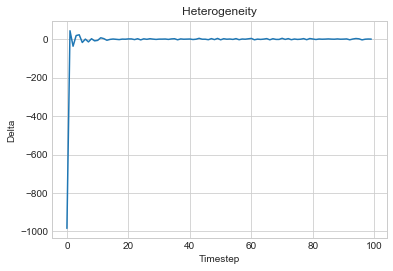

In [4]:
# Create recsys instance
rec = rec_dict[RECSYS_TYPE](NUM_USERS, NUM_ITEMS,
        num_items_per_iter=NUM_ITEMS_PER_ITER, randomize_recommended=True, actual_user_scores=True, 
        debugger=debugger, **rec_args[RECSYS_TYPE])

# Startup
rec.startup_and_train(timesteps=STARTUP_TIMESTEPS)

# Runtime
rec.run(timesteps=RUN_TIMESTEPS, train_between_steps=True, measurement_visualization_rule=lambda x: x % 50 == 0)
 # lambda function
delta_t = rec.get_measurements()

### You can run the system beyond the predefined time steps:

RECOMMENDER - Run -- interleave recommendations and random items from now on
RECOMMENDER - Step 0
RECOMMENDER - Row:
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]
RECOMMENDER - Indices_prime:
[[0 2 5 6 7]
 [0 2 3 5 6]
 [1 2 4 6 9]
 [2 3 4 5 7]
 [0 2 3 4 7]]
RECOMMENDER - Items ordered by preference for each user:
[[2 7 0 5 6]
 [2 3 5 0 6]
 [2 4 9 1 6]
 [2 3 7 4 5]
 [2 3 7 4 0]]
RECOMMENDER - System recommended these items (cols) to each user (rows):
[[0 5]
 [0 6]
 [6 1]
 [7 3]
 [2 0]]
USER_SCORES - User scores for given items are:
[[0.42 0.34]
 [0.34 0.45]
 [0.55 0.68]
 [0.52 0.17]
 [0.12 0.49]]
RECOMMENDER - Users choose the following items respectively:
[0 6 1 7 0]


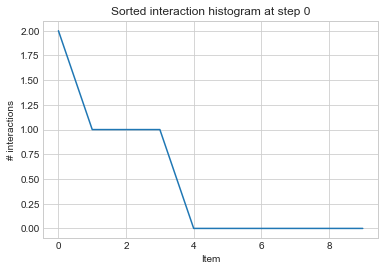

RECOMMENDER - System updates user profiles based on last interaction:
[[4 4 5 3 1 3 2 3 3 3]
 [3 4 5 3 2 3 3 5 3 3]
 [5 4 4 3 1 2 4 2 3 2]
 [4 4 5 4 1 2 4 4 3 2]
 [5 3 6 3 0 3 4 3 4 2]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.55 0.71 0.13 0.35 0.58 0.55 0.65 0.42 0.68 0.58]
 [0.50 0.68 0.09 0.29 0.62 0.50 0.65 0.50 0.62 0.59]
 [0.63 0.67 0.17 0.37 0.47 0.60 0.67 0.47 0.73 0.50]
 [0.61 0.67 0.12 0.30 0.52 0.55 0.67 0.52 0.70 0.58]
 [0.67 0.70 0.15 0.33 0.55 0.67 0.76 0.39 0.70 0.55]]
RECOMMENDER - Step 1
RECOMMENDER - Row:
[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]
 [4 4 4 4]]
RECOMMENDER - Indices_prime:
[[2 5 6 7]
 [0 2 3 5]
 [2 4 6 9]
 [2 3 4 5]
 [2 3 4 7]]
RECOMMENDER - Items ordered by preference for each user:
[[2 7 5 6]
 [2 3 0 5]
 [2 4 9 6]
 [2 3 4 5]
 [2 3 7 4]]
RECOMMENDER - System recommended these items (cols) to each user (rows):
[[6 2]
 [0 5]
 [6 2]
 [3 4]
 [4 4]]
USER_SCORES - User scores for given items are:
[[0.02 0.4

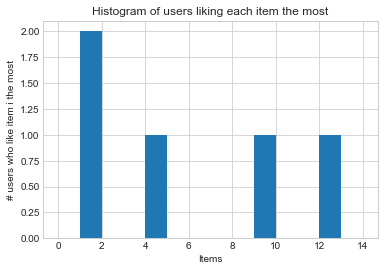

USER_SCORES - Actual scores given by users (rows) to items (columns), unknown to system:
[[0.42 0.53 0.02 0.10 0.78 0.34 0.42 0.49 0.55 0.45 0.28 0.23 0.51 0.49]
 [0.34 0.52 0.00 0.30 0.63 0.34 0.45 0.58 0.59 0.64 0.23 0.15 0.59 0.38]
 [0.41 0.68 0.09 0.39 0.64 0.51 0.55 0.35 0.67 0.48 0.14 0.31 0.59 0.36]
 [0.62 0.76 0.04 0.17 0.65 0.62 0.77 0.52 0.61 0.49 0.21 0.09 0.90 0.26]
 [0.49 0.84 0.12 0.38 0.54 0.44 0.54 0.46 0.68 0.55 0.18 0.25 0.82 0.31]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.58 0.67 0.15 0.35 0.56 0.60 0.71 0.44 0.65 0.54 0.23 0.21 0.79 0.29]
 [0.58 0.67 0.15 0.35 0.56 0.60 0.71 0.44 0.65 0.54 0.23 0.21 0.79 0.29]
 [0.58 0.67 0.15 0.35 0.56 0.60 0.71 0.44 0.65 0.54 0.23 0.21 0.79 0.29]
 [0.58 0.67 0.15 0.35 0.56 0.60 0.71 0.44 0.65 0.54 0.23 0.21 0.79 0.29]
 [0.58 0.67 0.15 0.35 0.56 0.60 0.71 0.44 0.65 0.54 0.23 0.21 0.79 0.29]]
RECOMMENDER - Row:
[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]
 [4 4 4 4]]
RECOMMENDER - In

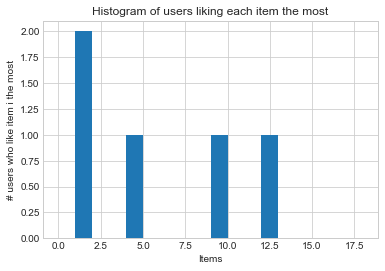

USER_SCORES - Actual scores given by users (rows) to items (columns), unknown to system:
[[0.42 0.53 0.02 0.10 0.78 0.34 0.42 0.49 0.55 0.45 0.28 0.23 0.51 0.49
  0.04 0.08 0.40 0.42]
 [0.34 0.52 0.00 0.30 0.63 0.34 0.45 0.58 0.59 0.64 0.23 0.15 0.59 0.38
  0.21 0.03 0.48 0.48]
 [0.41 0.68 0.09 0.39 0.64 0.51 0.55 0.35 0.67 0.48 0.14 0.31 0.59 0.36
  0.21 0.09 0.30 0.49]
 [0.62 0.76 0.04 0.17 0.65 0.62 0.77 0.52 0.61 0.49 0.21 0.09 0.90 0.26
  0.31 0.18 0.37 0.54]
 [0.49 0.84 0.12 0.38 0.54 0.44 0.54 0.46 0.68 0.55 0.18 0.25 0.82 0.31
  0.25 0.17 0.35 0.56]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.62 0.67 0.13 0.32 0.55 0.58 0.68 0.45 0.68 0.57 0.28 0.20 0.82 0.35
  0.20 0.10 0.35 0.43]
 [0.62 0.67 0.13 0.32 0.55 0.58 0.68 0.45 0.68 0.57 0.28 0.20 0.82 0.35
  0.20 0.10 0.35 0.43]
 [0.60 0.68 0.15 0.33 0.55 0.58 0.68 0.43 0.68 0.53 0.25 0.23 0.80 0.33
  0.20 0.10 0.33 0.43]
 [0.62 0.67 0.13 0.32 0.55 0.58 0.68 0.45 0.68 0.57 0.28 0.20 

In [5]:
# Run for some more time steps
#rec.run(timesteps=10, train_between_steps=True, measurement_visualization_rule=lambda x: x % 50 == 0)

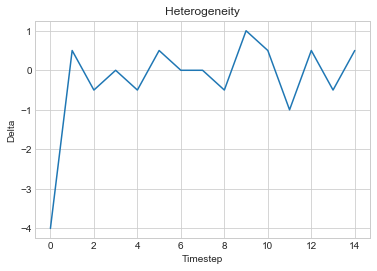

In [6]:
# Check heterogeneity again
#delta_t = rec.get_measurements()

## Further analysis

In [9]:
actual = rec.actual_user_scores.actual_scores

In [10]:
predicted = rec.predicted_scores

In [26]:
mse = ((predicted - actual)**2).mean()
root_mse = np.sqrt(mse)
root_mse

0.006059415423586351

In [28]:
rae = mse / np.var(actual)
rae

0.001116714643056214

In [29]:
mse

3.671651527559616e-05